<a href="https://colab.research.google.com/github/Ash-Stat/An-Si-Hyun/blob/data/%EB%AC%B4%EC%8A%A8%EC%9D%BC%EC%9D%B4%EC%A1%B0NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  신용평가 데이터에서 신경망을 통해 대출액을 예측해볼 수 있을까?

     무슨일이조
     2016251029 안시현
     2017151007 김연준
     2019147005 박종협
     2015147034 지현준

**[서론]**

위 데이터는 독일 신용평가 자료이다.
신용평가를 위한 다양한 변수들(당좌예금구좌, 대출기간, 신용경력, 신차구입목적, 중고차 구입목적, 텔레비젼 구입목적, 이혼, 미혼, 기혼남 여부, 부동산소유 여부등)이 포함되어 있으며 주로 categorical 변수들이 포함되어 있다.

이렇듯 신용평가를 하는 다양한 변수들을 이용해서 대출액을 신경망 모델을 통해 예측해 보도록 한다.

그리고 다양한 레이어와 노드를 뉴런의 수, 학습률 등 다양한 파라미터를 조정하여 위 데이터 셋에 맞는 최적의 모델을 구축해 보는 것을 목표로 한다.

---


**[데이터]**

1. OBS# Observation No. Categorical  
2. CHK_ACCT Checking account status Categorical 0 : < 0 DM 당좌예금구좌
            1:  0 < ...< 200 DM 0<...<200 마르크
            2 : => 200 DM 
            3:  no checking account 
3. DURATION Duration of credit in months Numerical  대출기간
4. HISTORY Credit history Categorical 0: no credits taken  신용경력
           1: all credits at this bank paid back duly  
           2: existing credits paid back duly till now  
           3: delay in paying off in the past   
           4: critical account   
5. NEW_CAR Purpose of credit Binary car (new)   0: No, 1: Yes 신차 구입 목적
6. USED_CAR Purpose of credit Binary car (used)    0: No, 1: Yes 중고차 구입목적
7. FURNITURE Purpose of credit Binary furniture/equipment    0: No, 1: Yes 가구구입목적
8. RADIO/TV Purpose of credit Binary radio/television    0: No, 1: Yes 텔리비젼 구입목적
9. EDUCATION Purpose of credit Binary education    0: No, 1: Yes 교육목적
10. RETRAINING Purpose of credit Binary retraining    0: No, 1: Yes 재교육목적
11. AMOUNT Credit amount Numerical  대출액
12. SAV_ACCT Average balance in savings account Categorical 0 : <  100 DM 저축액
         1 : 100<= ... <  500 DM 
         2 : 500<= ... < 1000 DM 
         3 : =>1000 DM 
         4 :   unknown/ no savings account 
13. EMPLOYMENT Present employment since Categorical 0 : unemployed 재직기간
         1:  < 1 year 
         2 : 1 <= ... < 4 years   
         3 : 4 <=... < 7 years 
         4 : >= 7 years 
14. INSTALL_RATE Installment rate as % of disposable income Numerical  
     소득대비납입비율
15. MALE_DIV Applicant is male and divorced Binary  0: No, 1: Yes 이혼남여부
16. MALE_SINGLE Applicant is male and single Binary  0: No, 1: Yes 미혼남여부
17. MALE_MAR_WID Applicant is male and married or a widower Binary  0: No, 1: Yes 
     기혼남여부
18. CO-APPLICANT Application has a co-applicant Binary  0: No, 1: Yes 공동신청여부
19. GUARANTOR Applicant has a guarantor Binary  0: No, 1: Yes 보증인여부
20. PRESENT_RESIDENT Present resident since - years Categorical 0: <= 1 year 거주기간
        1<…<=2 years 
        2<…<=3 years 
        3:>4years 
21. REAL_ESTATE Applicant owns real estate Binary  0: No, 1: Yes 부동산소유여부
22. PROP_UNKN_NONE Applicant owns no property (or unknown) Binary  0: No, 1: Yes 
     재산소유여부
23. AGE Age in years Numerical  나이
24. OTHER_INSTALL Applicant has other installment plan credit Binary  0: No, 1: Yes 
     다른 분납계획
25. RENT Applicant rents  Binary  0: No, 1: Yes 렌트여부
26. OWN_RES Applicant owns residence Binary  0: No, 1: Yes 집소유 여부
27. NUM_CREDITS Number of existing credits at this bank Numerical  해당은행 대출수
28. JOB Nature of job Categorical 0 : unemployed/ unskilled  - non-resident 직업
        1 : unskilled - resident 
        2 : skilled employee / official 
        3 : management/ self-employed/highly qualified employee/ officer 
29. NUM_DEPENDENTS Number of people for whom liable to provide maintenance Numerical 보증인수
30. TELEPHONE Applicant has phone in his or her name Binary  0: No, 1: Yes 
     전화보유 여부
31. FOREIGNER Foreign worker Binary  0: No, 1: Yes 외국인여부
32 RESPONSE Credit rating is good Binary  0: No, 1: Yes 신용여부

---

**[target 변수]**

AMOUNT - 대출액

---

**[설명 변수]**

AMOUNT를 제외한 나머지 변수들

---

**[예측타입]**

목표 변수인 대출액이 continous하므로, **regression**을 이용한다.


# Neural Network(MLP와 RBF)와 SOM에 대한 개념 설명

Neural Network 
인공신경망(artificial neural network)은 기계학습에 있어 생물의 신경망(동물의 중추신경계, 특히 뇌)에서 영감을 얻은 통계학적 학습 알고리즘이다. 인공신경망은 인공 뉴런(노드)들로 이루어져 있으며, 생물의 신경망에서 시냅스를 각 노드 간의 연결(edge)로 나타낸다. 뇌의 시냅스처럼 각 연결은 다른 노드에 신호를 전송할 수 있다. 신호를 수신 한 노드는 신호를 처리하고 연결된 노드에 신호를 보낼 수 있다. 각 노드의 출력은 입력 합계의 비선형 함수에 의해 계산된다. 노드와 연결(edge)은 학습이 진행됨에 가중치를 조정해 나가며. 가중치는 노드가 연결 신호의 강도를 증가 또는 감소시킨다. 인 
인공신경망에는 정답(교사 신호)의 입력에 의해 문제가 최적화되어가는 지도 학습(Supervised Learning)과 비지도 학습(Unsupervised Learning)이 존재한다. 명확한 해답이 있는 경우 지도 학습이, 데이터 클러스터링에는 비교사 학습이 주로 사용된다. 
인공신경망 사용에 있어서는 적절한 모델을 선택하는 것이 중요하며, 초기 가중치 값 설정도 중요하다. 더불어 적절한 수준의 숨은 계층과 뉴런(노드) 개수 설정을 통해 보다 정확한 결과를 도출 할 수 있다. 인공신경망을 사용하면, 높은 정확성을 가진 분류가 가능하지만 해석이 어렵다는 단점을 가지고있다. 더불어 많은 양의 데이터를 대상으로 사용해야하며, 이에 따라 학습 시간이 오래 걸린다는 단점이 존재한다. 

MLP (Multilayer Perceptron)
MLP는 단순하지만 다방면으로 사용되는 하나의 신경망 유형으로, 일반적으로 MLP는 하나 이상의 은닉 계층을 가지는 신경망 구조를 가진다. MLP 네트워크는 입력층, 은닉층, 출력층 방향으로 연결되어 있으며, 각 층내의 연결과 출력층에서 입력층으로의 직접적인 연결은 존재하지 않는 전방향 (Feedforward) 네트워크이다. 해당 신경망 구조를 통해 다양한 활성 함수를 도입해 비선형적으로 분리되는 데이터에 대한 학습이 가능하다. 더불어 다양한 입력 결합함수 사용이 가능하며 다른 유형의 목표 값을 가지는 것도 가능하다. 은닉층의 수를 증가시킬수록 더 복잡한 비선형 분류가 가능하지만, 그만큼 더 오랜 시간이 걸린다는 단점이 존재한다. 

RBF (Radial Basis Function)
RBF는 단순한 네트워크 구조를 하지고 있는데, RBF에는 은닉 계층이 한 층만 존재하기 때문이다. RBF의 수학적 형태는 MLP와 유사하지만, 은닉계층의 단위가 다르게 표현되는 특징을 가진다. 각 은닉단위는 RBF로, 이들은 서로 다른 중점과 반경을 갖는다. 은닉 단위는 종모양의 표면을 나타내며, 사례가 중점에 가까울수록 더 큰 RBF 값을 갖는다. RBF는 MLP에 비해 단순한 구조로 보다 적은 시간을 통해 계산이 가능하다. 

SOM(Self Organizing Map)
SOM은 다차원의 특징 벡터의 차원을 축소시키면서 군집화를 수행할 수 있는 신경망 알고리즘의 종류이다. SOM은 비교사 학습 중 일종이며, 비슷한 성향의 input끼리 그룹화 시키는 것을 목표로 한다. 각 입력 값 중 하나가 선택되며, 선택된 값은 각 노드와의 거를 계산하게 된다. 계산된 거리를 기반으로 노드의 가중치가 업데이트 되고, 입력된 모든 입력 값의 가중치가 업데이트 될 때까지 이 과정을 반복한다. 가까운 노드는 더 가깝게, 먼 노드는 더 멀게 가중치가 조정되므로, 모든 과정이 수행되면 최종적으로 유사한 군집의 입력 값끼리 모이게 된다. 경쟁학습(competitive learning)을 통해 노드가 갱신되므로 winner takes all의 면모를 보인다.


# 필요한 모듈 다운로드

In [316]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.utils import plot_model

# 4개의 regression모델 평가지표 함수로 만들기

In [318]:
def rmse(y_true, y_pred):
    return np.sqrt(((y_true - y_pred) ** 2).mean())
def mae(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred)))
def mape(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
def mpe(y_true, y_pred): 
    return np.mean((y_true - y_pred) / y_true)

# 데이터 불러오기, 필요없는 관측수(OBS)는 제거한다.

또한, sample size는 1,000개와 더불어 총 30개의 설명변수와 1개의 타겟변수를 가져 총 31개의 변수들이 있다.

In [319]:
df=pd.read_csv('./GermanCredit.csv')
df=df.drop(['OBS'],axis=1)
df

,CHK_ACCT,DURATION,HISTORY,NEW_CAR,USED_CAR,FURNITURE,RADIO/TV,EDUCATION,RETRAINING,AMOUNT,SAV_ACCT,EMPLOYMENT,INSTALL_RATE,MALE_DIV,MALE_SINGLE,MALE_MAR_or_WID,CO-APPLICANT,GUARANTOR,PRESENT_RESIDENT,REAL_ESTATE,PROP_UNKN_NONE,AGE,OTHER_INSTALL,RENT,OWN_RES,NUM_CREDITS,JOB,NUM_DEPENDENTS,TELEPHONE,FOREIGN,RESPONSE
0,0,6,4,0,0,0,1,0,0,1169,4,4,4,0,1,0,0,0,4,1,0,67,0,0,1,2,2,1,1,0,1
1,1,48,2,0,0,0,1,0,0,5951,0,2,2,0,0,0,0,0,2,1,0,22,0,0,1,1,2,1,0,0,0
2,3,12,4,0,0,0,0,1,0,2096,0,3,2,0,1,0,0,0,3,1,0,49,0,0,1,1,1,2,0,0,1
3,0,42,2,0,0,1,0,0,0,7882,0,3,2,0,1,0,0,1,4,0,0,45,0,0,0,1,2,2,0,0,1
4,0,24,3,1,0,0,0,0,0,4870,0,2,3,0,1,0,0,0,4,0,1,53,0,0,0,2,2,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,12,2,0,0,1,0,0,0,1736,0,3,3,0,0,0,0,0,4,1,0,31,0,0,1,1,1,1,0,0,1
996,0,30,2,0,1,0,0,0,0,3857,0,2,4,1,0,0,0,0,4,0,0,40,0,0,1,1,3,1,1,0,1
997,3,12,2,0,0,0,1,0,0,804,0,4,4,0,1,0,0,0,4,0,0,38,0,0,1,1,2,1,0,0,1
998,0,45,2,0,0,0,1,0,0,1845,0,2,4,0,1,0,0,0,4,0,1,23,0,0,0,1,2,1,1,0,0


# 데이터의 기본 정보 살펴보기, 결측값은 없다.

In [320]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 31 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   CHK_ACCT          1000 non-null   int64
 1   DURATION          1000 non-null   int64
 2   HISTORY           1000 non-null   int64
 3   NEW_CAR           1000 non-null   int64
 4   USED_CAR          1000 non-null   int64
 5   FURNITURE         1000 non-null   int64
 6   RADIO/TV          1000 non-null   int64
 7   EDUCATION         1000 non-null   int64
 8   RETRAINING        1000 non-null   int64
 9   AMOUNT            1000 non-null   int64
 10  SAV_ACCT          1000 non-null   int64
 11  EMPLOYMENT        1000 non-null   int64
 12  INSTALL_RATE      1000 non-null   int64
 13  MALE_DIV          1000 non-null   int64
 14  MALE_SINGLE       1000 non-null   int64
 15  MALE_MAR_or_WID   1000 non-null   int64
 16  CO-APPLICANT      1000 non-null   int64
 17  GUARANTOR         1000 non-null   

# 결측값 다시 확인해보기

In [321]:
df.isnull().sum()

CHK_ACCT            0
DURATION            0
HISTORY             0
NEW_CAR             0
USED_CAR            0
FURNITURE           0
RADIO/TV            0
EDUCATION           0
RETRAINING          0
AMOUNT              0
SAV_ACCT            0
EMPLOYMENT          0
INSTALL_RATE        0
MALE_DIV            0
MALE_SINGLE         0
MALE_MAR_or_WID     0
CO-APPLICANT        0
GUARANTOR           0
PRESENT_RESIDENT    0
REAL_ESTATE         0
PROP_UNKN_NONE      0
AGE                 0
OTHER_INSTALL       0
RENT                0
OWN_RES             0
NUM_CREDITS         0
JOB                 0
NUM_DEPENDENTS      0
TELEPHONE           0
FOREIGN             0
RESPONSE            0
dtype: int64

# 나이 변수를 나이대별로 구분하기, 10대, 20대 등...

In [322]:
for i,ind in zip(df['AGE'],df.index):
  i=str(i)
  i=i[0]
  df['AGE'].loc[ind] = i
df=df.astype('float')
df

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,CHK_ACCT,DURATION,HISTORY,NEW_CAR,USED_CAR,FURNITURE,RADIO/TV,EDUCATION,RETRAINING,AMOUNT,SAV_ACCT,EMPLOYMENT,INSTALL_RATE,MALE_DIV,MALE_SINGLE,MALE_MAR_or_WID,CO-APPLICANT,GUARANTOR,PRESENT_RESIDENT,REAL_ESTATE,PROP_UNKN_NONE,AGE,OTHER_INSTALL,RENT,OWN_RES,NUM_CREDITS,JOB,NUM_DEPENDENTS,TELEPHONE,FOREIGN,RESPONSE
0,0.0,6.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,1169.0,4.0,4.0,4.0,0.0,1.0,0.0,0.0,0.0,4.0,1.0,0.0,6.0,0.0,0.0,1.0,2.0,2.0,1.0,1.0,0.0,1.0
1,1.0,48.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,5951.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,2.0,0.0,0.0,1.0,1.0,2.0,1.0,0.0,0.0,0.0
2,3.0,12.0,4.0,0.0,0.0,0.0,0.0,1.0,0.0,2096.0,0.0,3.0,2.0,0.0,1.0,0.0,0.0,0.0,3.0,1.0,0.0,4.0,0.0,0.0,1.0,1.0,1.0,2.0,0.0,0.0,1.0
3,0.0,42.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,7882.0,0.0,3.0,2.0,0.0,1.0,0.0,0.0,1.0,4.0,0.0,0.0,4.0,0.0,0.0,0.0,1.0,2.0,2.0,0.0,0.0,1.0
4,0.0,24.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,4870.0,0.0,2.0,3.0,0.0,1.0,0.0,0.0,0.0,4.0,0.0,1.0,5.0,0.0,0.0,0.0,2.0,2.0,2.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3.0,12.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1736.0,0.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,0.0,3.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0
996,0.0,30.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,3857.0,0.0,2.0,4.0,1.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,4.0,0.0,0.0,1.0,1.0,3.0,1.0,1.0,0.0,1.0
997,3.0,12.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,804.0,0.0,4.0,4.0,0.0,1.0,0.0,0.0,0.0,4.0,0.0,0.0,3.0,0.0,0.0,1.0,1.0,2.0,1.0,0.0,0.0,1.0
998,0.0,45.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,1845.0,0.0,2.0,4.0,0.0,1.0,0.0,0.0,0.0,4.0,0.0,1.0,2.0,0.0,0.0,0.0,1.0,2.0,1.0,1.0,0.0,0.0


# continous 변수들은 Duration, Amount 이 두 가지 밖에 없기 때문에 기초통계량은 이 두 가지 변수들만 살펴본다.

# Duration 변수의 기초통계량

평균이 중간값 보다 높은걸 보니 대체로 평균 위의 값들이 포진해 있음을 알 수 있다.

In [182]:
df.DURATION.describe()

count    1000.000000
mean       20.903000
std        12.058814
min         4.000000
25%        12.000000
50%        18.000000
75%        24.000000
max        72.000000
Name: DURATION, dtype: float64

# Amount 변수의 기초통계량
평균이 중간값보다 훨씬 높은것을 보니, 평균 위의 값들이 상당 수 포진해 있음을 알 수 있다.

In [183]:
df.AMOUNT.describe()

count     1000.000000
mean      3271.258000
std       2822.736876
min        250.000000
25%       1365.500000
50%       2319.500000
75%       3972.250000
max      18424.000000
Name: AMOUNT, dtype: float64

# 나머지 범주형 변수들의 값분포, 값들의 비율을 알아보자.

대체로 고르게 퍼져있는 것이 아닌, 특정 값에 몰려있는 것을 알 수 있다.

즉, 범주형  변수들이 대체로 imbalance하다는 것

In [184]:
for i in df.drop(['AMOUNT','DURATION'],axis=1):
  print(df[i].value_counts()/len(df[i]))

3.0    0.394
0.0    0.274
1.0    0.269
2.0    0.063
Name: CHK_ACCT, dtype: float64
2.0    0.530
4.0    0.293
3.0    0.088
1.0    0.049
0.0    0.040
Name: HISTORY, dtype: float64
0.0    0.766
1.0    0.234
Name: NEW_CAR, dtype: float64
0.0    0.897
1.0    0.103
Name: USED_CAR, dtype: float64
0.0    0.819
1.0    0.181
Name: FURNITURE, dtype: float64
0.0    0.72
1.0    0.28
Name: RADIO/TV, dtype: float64
0.0    0.95
1.0    0.05
Name: EDUCATION, dtype: float64
0.0    0.903
1.0    0.097
Name: RETRAINING, dtype: float64
0.0    0.603
4.0    0.183
1.0    0.103
2.0    0.063
3.0    0.048
Name: SAV_ACCT, dtype: float64
2.0    0.339
4.0    0.253
3.0    0.174
1.0    0.172
0.0    0.062
Name: EMPLOYMENT, dtype: float64
4.0    0.476
2.0    0.231
3.0    0.157
1.0    0.136
Name: INSTALL_RATE, dtype: float64
0.0    0.95
1.0    0.05
Name: MALE_DIV, dtype: float64
1.0    0.548
0.0    0.452
Name: MALE_SINGLE, dtype: float64
0.0    0.908
1.0    0.092
Name: MALE_MAR_or_WID, dtype: float64
0.0    0.959
1.0    0

# 범주형 변수들의 범주별 관측값 시각화

역시 상당수 imbalance 되어 있음을 알 수 있다.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



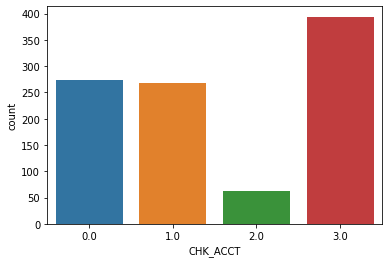

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



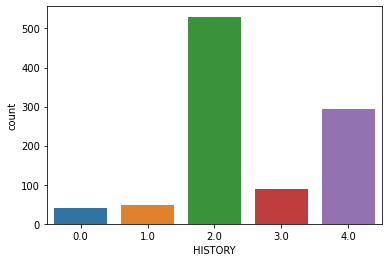

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



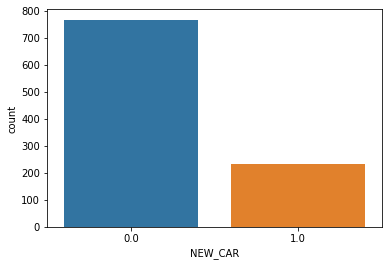

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



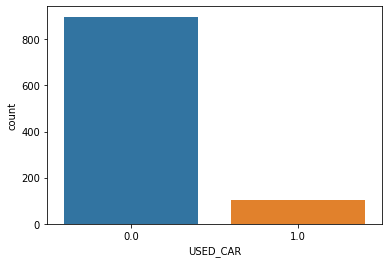

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



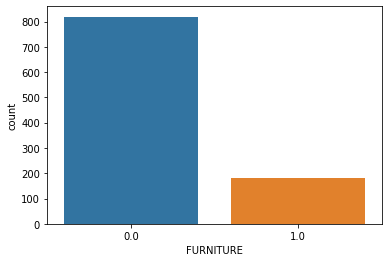

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



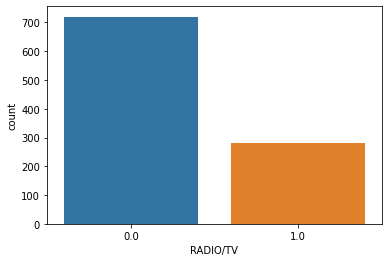

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



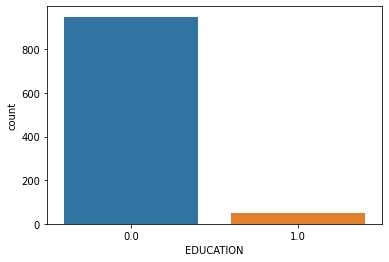

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



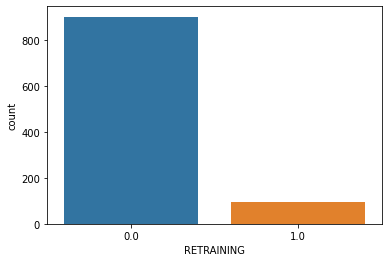

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



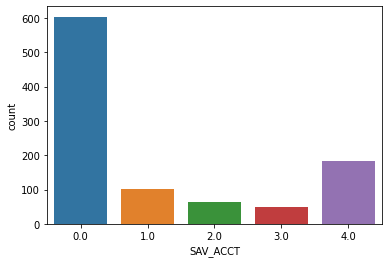

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



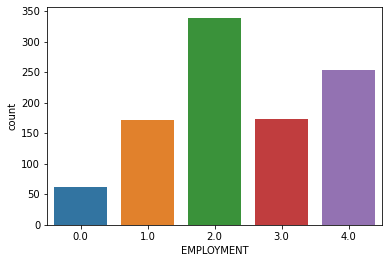

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



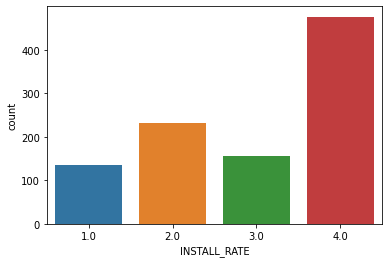

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



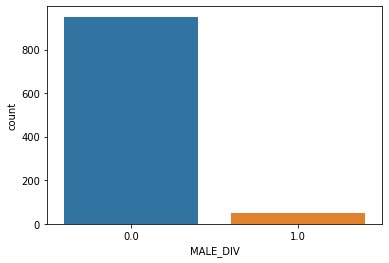

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



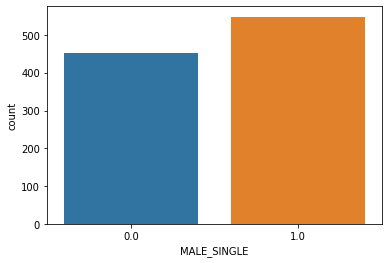

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



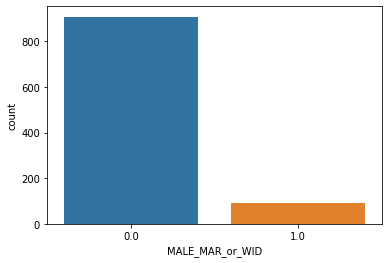

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



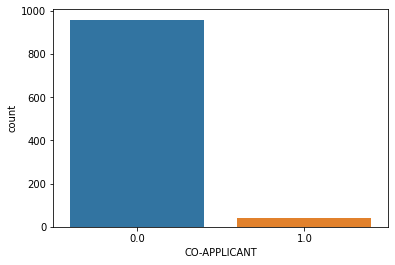

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



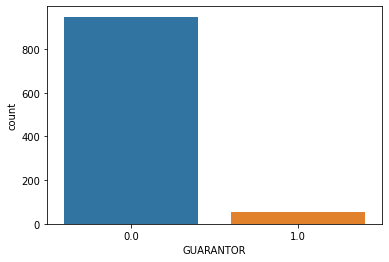

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



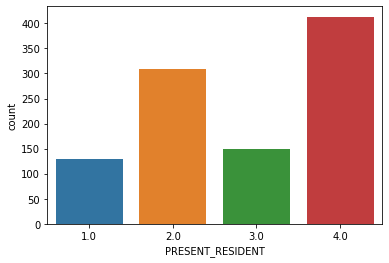

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



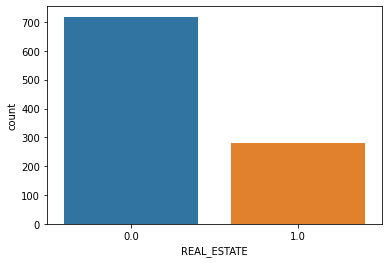

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



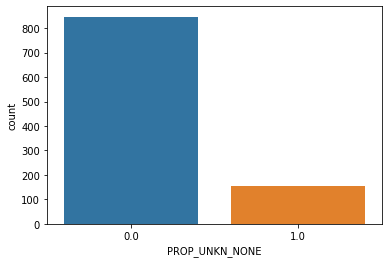

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



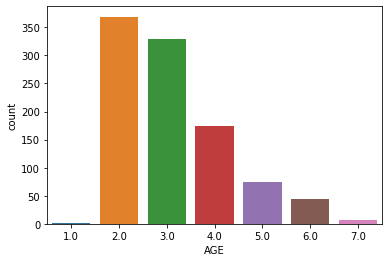

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



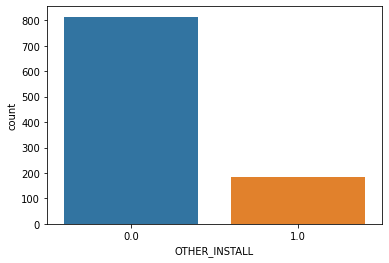

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



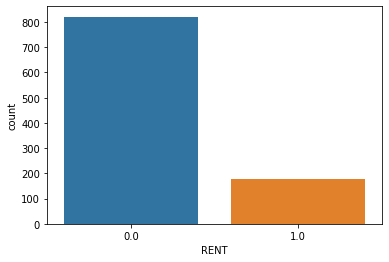

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



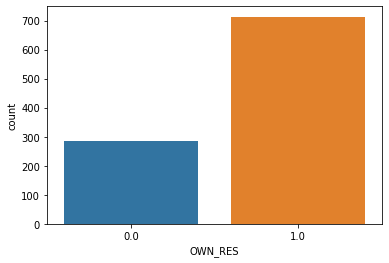

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



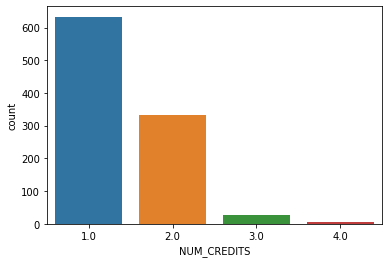

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



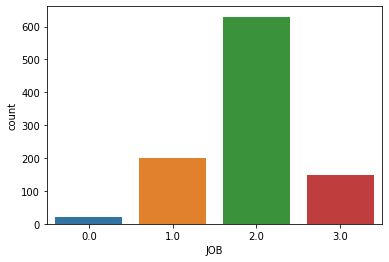

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



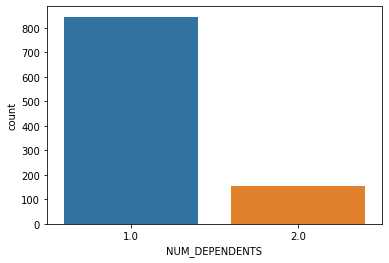

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



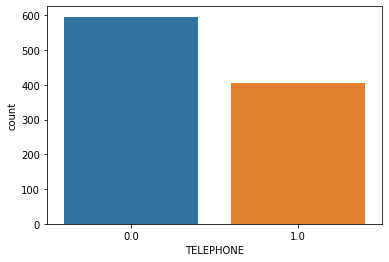

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



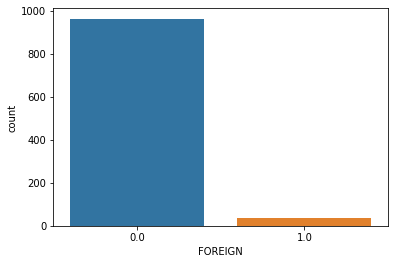

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



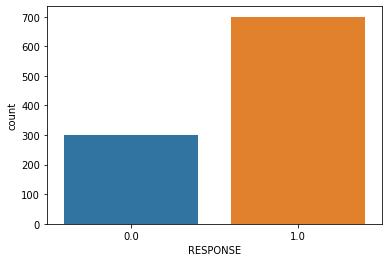

In [185]:
for i in df.drop(['AMOUNT','DURATION'],axis=1):
  sns.countplot(df[i])
  plt.show()
  plt.close()

# 종속변수, 독립변수로 분리하기

In [186]:
yy=df['AMOUNT']
xx=df.drop(['AMOUNT'],axis=1)

# 훈련, 검증, 테스트 데이터셋으로 나누기

이전 실습들과 달리 중간에 validation_x & y를 추가한 이유는 신경망 모델을 돌릴때 훈련데이터셋에 대한 검증용 데이터셋을 같이 추가하여 돌리고자 하기 위함이다.(과적합 방지) 또한, 성능지표를 관찰함에 있어서 보다 정확한 측정이 가능해지기 때문에, 단순히 훈련, 테스트 데이터셋으로 나누지 않고 중간에 검증용 데이터셋을 따로 분리하였다.

In [187]:
train_x,test_x,train_y,test_y=train_test_split(xx,yy,test_size=0.2,random_state=2016251029)
train_x,valid_x,train_y,valid_y = train_test_split(train_x,train_y, test_size=0.2, random_state=2016251029)

# 데이터의 갯수를 확인해서 제대로 나눠졌는지 확인해보기

In [188]:
print(len(train_x))
print(len(train_y))

print(len(valid_x))
print(len(valid_y))

print(len(test_x))
print(len(test_y))

640
640
160
160
200
200


# 표준화를 위한 작업

train을 기준으로 표준화 시켜준다.

In [189]:
mean = train_x.mean(axis=0)
train_x -=mean

std = train_x.std(axis=0)
train_x /=std

valid_x -=mean
valid_y /=std

test_x -=mean
test_x /=std

# 훈련, 검증, 테스트 데이터셋을 다시 확인해봐서 잘 표준화가 되었는지 확인

In [190]:
train_x

,CHK_ACCT,DURATION,HISTORY,NEW_CAR,USED_CAR,FURNITURE,RADIO/TV,EDUCATION,RETRAINING,SAV_ACCT,EMPLOYMENT,INSTALL_RATE,MALE_DIV,MALE_SINGLE,MALE_MAR_or_WID,CO-APPLICANT,GUARANTOR,PRESENT_RESIDENT,REAL_ESTATE,PROP_UNKN_NONE,AGE,OTHER_INSTALL,RENT,OWN_RES,NUM_CREDITS,JOB,NUM_DEPENDENTS,TELEPHONE,FOREIGN,RESPONSE
715,1.110942,0.801799,1.289137,-0.545627,2.946758,-0.494725,-0.634727,-0.205619,-0.315437,1.848912,1.334244,-1.690602,-0.229236,0.906684,-0.341681,-0.192922,-0.229236,1.051811,-0.641996,-0.404204,2.512608,-0.49228,-0.467659,0.610579,0.989632,0.176966,-0.41201,-0.821180,-0.197231,0.649278
196,1.110942,-1.245006,1.289137,-0.545627,-0.338826,-0.494725,1.573019,-0.205619,-0.315437,-0.691729,-0.304751,-1.690602,-0.229236,-1.101197,-0.341681,-0.192922,-0.229236,-1.626540,-0.641996,-0.404204,-0.941890,-0.49228,-0.467659,0.610579,0.989632,0.176966,-0.41201,1.215856,-0.197231,0.649278
600,-0.460335,-1.159723,-0.544302,-0.545627,-0.338826,-0.494725,1.573019,-0.205619,-0.315437,-0.691729,-1.124248,-1.690602,-0.229236,-1.101197,-0.341681,-0.192922,4.355492,-1.626540,1.555209,-0.404204,0.785359,-0.49228,-0.467659,0.610579,-0.736157,0.176966,-0.41201,-0.821180,-0.197231,0.649278
775,-1.245974,0.290097,-0.544302,1.829891,-0.338826,-0.494725,-0.634727,-0.205619,-0.315437,1.848912,-0.304751,0.924995,-0.229236,-1.101197,-0.341681,-0.192922,-0.229236,1.051811,1.555209,-0.404204,-0.941890,-0.49228,2.134967,-1.635230,-0.736157,0.176966,-0.41201,-0.821180,-0.197231,-1.537765
231,1.110942,-0.989156,-0.544302,1.829891,-0.338826,-0.494725,-0.634727,-0.205619,-0.315437,0.578591,1.334244,-0.818737,-0.229236,0.906684,-0.341681,-0.192922,-0.229236,1.051811,-0.641996,2.470134,1.648983,-0.49228,-0.467659,-1.635230,-0.736157,-1.333142,-0.41201,-0.821180,-0.197231,0.649278
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,-1.245974,-0.903872,-0.544302,-0.545627,-0.338826,-0.494725,1.573019,-0.205619,-0.315437,-0.691729,1.334244,0.053129,-0.229236,0.906684,-0.341681,-0.192922,-0.229236,1.051811,1.555209,-0.404204,1.648983,-0.49228,-0.467659,0.610579,-0.736157,-1.333142,-0.41201,-0.821180,-0.197231,0.649278
265,-0.460335,-0.477455,-0.544302,-0.545627,-0.338826,-0.494725,1.573019,-0.205619,-0.315437,-0.691729,1.334244,0.924995,-0.229236,0.906684,-0.341681,-0.192922,-0.229236,0.159027,-0.641996,-0.404204,-0.078266,-0.49228,-0.467659,0.610579,-0.736157,0.176966,2.42333,-0.821180,-0.197231,-1.537765
643,1.110942,0.290097,1.289137,-0.545627,-0.338826,-0.494725,1.573019,-0.205619,-0.315437,-0.691729,0.514747,0.924995,-0.229236,-1.101197,2.922136,-0.192922,4.355492,-0.733756,-0.641996,-0.404204,-0.078266,-0.49228,-0.467659,0.610579,0.989632,0.176966,-0.41201,1.215856,-0.197231,0.649278
268,-1.245974,-0.562738,-0.544302,1.829891,-0.338826,-0.494725,-0.634727,-0.205619,-0.315437,-0.691729,1.334244,-1.690602,4.355492,-1.101197,-0.341681,-0.192922,-0.229236,1.051811,-0.641996,-0.404204,0.785359,-0.49228,-0.467659,0.610579,-0.736157,1.687073,-0.41201,1.215856,5.062269,-1.537765


In [191]:
valid_x

,CHK_ACCT,DURATION,HISTORY,NEW_CAR,USED_CAR,FURNITURE,RADIO/TV,EDUCATION,RETRAINING,SAV_ACCT,EMPLOYMENT,INSTALL_RATE,MALE_DIV,MALE_SINGLE,MALE_MAR_or_WID,CO-APPLICANT,GUARANTOR,PRESENT_RESIDENT,REAL_ESTATE,PROP_UNKN_NONE,AGE,OTHER_INSTALL,RENT,OWN_RES,NUM_CREDITS,JOB,NUM_DEPENDENTS,TELEPHONE,FOREIGN,RESPONSE
93,0.414062,3.401563,1.40625,-0.229687,-0.103125,0.803125,-0.2875,-0.040625,-0.090625,2.910938,1.628125,1.060938,-0.05,0.451562,-0.104688,0.964063,-0.05,1.178125,-0.292187,0.859375,-1.090625,-0.195312,0.820312,-0.728125,0.573438,0.117188,-0.145312,-0.403125,-0.0375,0.296875
154,-0.585938,3.401563,0.40625,-0.229687,-0.103125,-0.196875,-0.2875,-0.040625,0.909375,-0.089063,0.628125,1.060938,-0.05,0.451562,-0.104688,-0.035937,-0.05,1.178125,-0.292187,-0.140625,-0.090625,-0.195312,0.820312,-0.728125,-0.426562,1.117188,-0.145312,0.596875,-0.0375,0.296875
490,1.414062,-8.598437,1.40625,-0.229687,-0.103125,-0.196875,0.7125,-0.040625,-0.090625,-1.089063,1.628125,-0.939062,-0.05,0.451562,-0.104688,-0.035937,-0.05,-0.821875,-0.292187,0.859375,-1.090625,-0.195312,-0.179688,0.271875,0.573438,0.117188,-0.145312,-0.403125,-0.0375,0.296875
890,-1.585938,6.401563,1.40625,-0.229687,-0.103125,-0.196875,-0.2875,-0.040625,0.909375,-1.089063,1.628125,1.060938,-0.05,0.451562,-0.104688,-0.035937,-0.05,1.178125,-0.292187,-0.140625,0.909375,0.804688,-0.179688,0.271875,2.573437,1.117188,0.854688,0.596875,-0.0375,0.296875
978,1.414062,3.401563,0.40625,0.770312,-0.103125,-0.196875,-0.2875,-0.040625,-0.090625,-1.089063,1.628125,1.060938,-0.05,0.451562,-0.104688,-0.035937,-0.05,1.178125,-0.292187,-0.140625,0.909375,-0.195312,-0.179688,0.271875,0.573438,-0.882812,0.854688,-0.403125,-0.0375,-0.703125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,-1.585938,3.401563,-0.59375,-0.229687,-0.103125,-0.196875,-0.2875,-0.040625,-0.090625,-1.089063,1.628125,1.060938,-0.05,-0.548438,-0.104688,-0.035937,0.95,1.178125,0.707812,-0.140625,1.909375,-0.195312,-0.179688,0.271875,-0.426562,-0.882812,-0.145312,0.596875,-0.0375,0.296875
13,-1.585938,3.401563,1.40625,0.770312,-0.103125,-0.196875,-0.2875,-0.040625,-0.090625,-1.089063,1.628125,1.060938,-0.05,0.451562,-0.104688,-0.035937,-0.05,1.178125,-0.292187,-0.140625,2.909375,-0.195312,-0.179688,0.271875,0.573438,-0.882812,-0.145312,-0.403125,-0.0375,-0.703125
292,-1.585938,3.401563,1.40625,-0.229687,0.896875,-0.196875,-0.2875,-0.040625,-0.090625,-1.089063,1.628125,-0.939062,-0.05,-0.548438,-0.104688,-0.035937,-0.05,1.178125,-0.292187,0.859375,0.909375,-0.195312,-0.179688,-0.728125,0.573438,1.117188,0.854688,0.596875,-0.0375,0.296875
333,1.414062,27.401563,1.40625,-0.229687,0.896875,-0.196875,-0.2875,-0.040625,-0.090625,-0.089063,-0.371875,-0.939062,-0.05,-0.548438,-0.104688,-0.035937,-0.05,1.178125,-0.292187,-0.140625,-1.090625,0.804688,0.820312,-0.728125,0.573438,-0.882812,-0.145312,-0.403125,-0.0375,-0.703125


In [192]:
test_x

,CHK_ACCT,DURATION,HISTORY,NEW_CAR,USED_CAR,FURNITURE,RADIO/TV,EDUCATION,RETRAINING,SAV_ACCT,EMPLOYMENT,INSTALL_RATE,MALE_DIV,MALE_SINGLE,MALE_MAR_or_WID,CO-APPLICANT,GUARANTOR,PRESENT_RESIDENT,REAL_ESTATE,PROP_UNKN_NONE,AGE,OTHER_INSTALL,RENT,OWN_RES,NUM_CREDITS,JOB,NUM_DEPENDENTS,TELEPHONE,FOREIGN,RESPONSE
244,1.110942,-0.733305,-1.461022,-0.545627,-0.338826,-0.494725,-0.634727,-0.205619,-0.315437,0.578591,-0.304751,0.924995,-0.229236,-1.101197,-0.341681,-0.192922,-0.229236,0.159027,1.555209,-0.404204,-0.078266,-0.492280,-0.467659,0.610579,-0.736157,-1.333142,2.42333,-0.821180,-0.197231,0.649278
325,-1.245974,-1.074439,1.289137,1.829891,-0.338826,-0.494725,-0.634727,-0.205619,-0.315437,-0.691729,0.514747,-1.690602,-0.229236,0.906684,-0.341681,-0.192922,-0.229236,1.051811,1.555209,-0.404204,-0.078266,-0.492280,-0.467659,0.610579,0.989632,-1.333142,-0.41201,-0.821180,5.062269,0.649278
561,-1.245974,0.290097,-1.461022,-0.545627,-0.338826,-0.494725,1.573019,-0.205619,-0.315437,-0.691729,0.514747,0.924995,-0.229236,0.906684,-0.341681,-0.192922,4.355492,1.051811,-0.641996,-0.404204,-0.941890,2.028192,2.134967,-1.635230,-0.736157,-1.333142,-0.41201,-0.821180,-0.197231,-1.537765
73,-0.460335,1.825201,1.289137,-0.545627,-0.338826,-0.494725,-0.634727,-0.205619,3.165249,-0.691729,0.514747,-0.818737,-0.229236,-1.101197,-0.341681,-0.192922,-0.229236,-1.626540,1.555209,-0.404204,0.785359,2.028192,-0.467659,0.610579,0.989632,-1.333142,-0.41201,-0.821180,-0.197231,0.649278
45,1.110942,-0.818589,1.289137,1.829891,-0.338826,-0.494725,-0.634727,-0.205619,-0.315437,-0.691729,-1.124248,0.924995,-0.229236,-1.101197,-0.341681,-0.192922,-0.229236,1.051811,-0.641996,-0.404204,-0.078266,-0.492280,-0.467659,0.610579,0.989632,1.687073,-0.41201,-0.821180,-0.197231,0.649278
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47,-1.245974,-1.245006,-0.544302,-0.545627,2.946758,-0.494725,-0.634727,-0.205619,-0.315437,0.578591,-1.943745,-1.690602,-0.229236,-1.101197,-0.341681,-0.192922,-0.229236,-0.733756,-0.641996,-0.404204,-0.941890,-0.492280,2.134967,-1.635230,-0.736157,-2.843249,-0.41201,1.215856,-0.197231,0.649278
714,-0.460335,3.360305,-0.544302,1.829891,-0.338826,-0.494725,-0.634727,-0.205619,-0.315437,-0.691729,0.514747,0.924995,-0.229236,0.906684,-0.341681,-0.192922,-0.229236,-0.733756,-0.641996,2.470134,-0.941890,-0.492280,-0.467659,0.610579,-0.736157,1.687073,-0.41201,1.215856,-0.197231,-1.537765
712,1.110942,0.034247,-0.544302,-0.545627,2.946758,-0.494725,-0.634727,-0.205619,-0.315437,1.848912,1.334244,0.924995,-0.229236,0.906684,-0.341681,-0.192922,-0.229236,1.051811,1.555209,-0.404204,0.785359,-0.492280,-0.467659,0.610579,-0.736157,1.687073,-0.41201,1.215856,-0.197231,0.649278
522,-1.245974,2.336902,-2.377741,-0.545627,-0.338826,2.018165,-0.634727,-0.205619,-0.315437,-0.691729,-0.304751,0.053129,-0.229236,0.906684,-0.341681,-0.192922,-0.229236,1.051811,-0.641996,2.470134,1.648983,-0.492280,-0.467659,-1.635230,0.989632,0.176966,2.42333,-0.821180,-0.197231,-1.537765


# 표준화 잘 되었는지 평균, 분산 확인해보기

평균은 0에 수렴, 분산은 1에 잘 수렴하고 있는 모습이다.

In [193]:
train_x.describe()

,CHK_ACCT,DURATION,HISTORY,NEW_CAR,USED_CAR,FURNITURE,RADIO/TV,EDUCATION,RETRAINING,SAV_ACCT,EMPLOYMENT,INSTALL_RATE,MALE_DIV,MALE_SINGLE,MALE_MAR_or_WID,CO-APPLICANT,GUARANTOR,PRESENT_RESIDENT,REAL_ESTATE,PROP_UNKN_NONE,AGE,OTHER_INSTALL,RENT,OWN_RES,NUM_CREDITS,JOB,NUM_DEPENDENTS,TELEPHONE,FOREIGN,RESPONSE
count,6.400000e+02,6.400000e+02,6.400000e+02,6.400000e+02,6.400000e+02,6.400000e+02,6.400000e+02,6.400000e+02,6.400000e+02,6.400000e+02,6.400000e+02,6.400000e+02,6.400000e+02,6.400000e+02,6.400000e+02,6.400000e+02,6.400000e+02,6.400000e+02,6.400000e+02,6.400000e+02,6.400000e+02,6.400000e+02,6.400000e+02,6.400000e+02,6.400000e+02,6.400000e+02,6.400000e+02,6.400000e+02,6.400000e+02,6.400000e+02
mean,-5.620504e-17,-1.613293e-17,-5.689893e-17,1.717376e-17,1.762479e-16,1.942890e-17,-2.775558e-18,6.884250e-16,8.049117e-17,7.112366e-17,-2.333203e-16,1.589007e-16,-5.884616e-16,-2.775558e-18,1.514414e-16,-2.153659e-16,9.861903e-17,9.870577e-17,-8.243406e-16,1.392983e-16,-2.128506e-16,1.403391e-16,6.522560e-17,-2.900458e-16,9.159340e-17,-8.001412e-17,-1.340941e-16,-6.591949e-18,-4.315125e-17,9.714451e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.245974e+00,-1.415573e+00,-2.377741e+00,-5.456267e-01,-3.388258e-01,-4.947253e-01,-6.347269e-01,-2.056189e-01,-3.154372e-01,-6.917293e-01,-1.943745e+00,-1.690602e+00,-2.292364e-01,-1.101197e+00,-3.416808e-01,-1.929220e-01,-2.292364e-01,-1.626540e+00,-6.419957e-01,-4.042038e-01,-1.805515e+00,-4.922796e-01,-4.676594e-01,-1.635230e+00,-7.361570e-01,-2.843249e+00,-4.120105e-01,-8.211805e-01,-1.972312e-01,-1.537765e+00
25%,-1.245974e+00,-7.333052e-01,-5.443023e-01,-5.456267e-01,-3.388258e-01,-4.947253e-01,-6.347269e-01,-2.056189e-01,-3.154372e-01,-6.917293e-01,-3.047505e-01,-8.187366e-01,-2.292364e-01,-1.101197e+00,-3.416808e-01,-1.929220e-01,-2.292364e-01,-7.337565e-01,-6.419957e-01,-4.042038e-01,-9.418905e-01,-4.922796e-01,-4.676594e-01,-1.635230e+00,-7.361570e-01,1.769657e-01,-4.120105e-01,-8.211805e-01,-1.972312e-01,-1.537765e+00
50%,-4.603352e-01,-2.216039e-01,-5.443023e-01,-5.456267e-01,-3.388258e-01,-4.947253e-01,-6.347269e-01,-2.056189e-01,-3.154372e-01,-6.917293e-01,-3.047505e-01,5.312933e-02,-2.292364e-01,9.066837e-01,-3.416808e-01,-1.929220e-01,-2.292364e-01,1.590271e-01,-6.419957e-01,-4.042038e-01,-7.826597e-02,-4.922796e-01,-4.676594e-01,6.105793e-01,-7.361570e-01,1.769657e-01,-4.120105e-01,-8.211805e-01,-1.972312e-01,6.492784e-01
75%,1.110942e+00,2.900973e-01,1.289137e+00,-5.456267e-01,-3.388258e-01,-4.947253e-01,1.573019e+00,-2.056189e-01,-3.154372e-01,5.785913e-01,1.334244e+00,9.249952e-01,-2.292364e-01,9.066837e-01,-3.416808e-01,-1.929220e-01,-2.292364e-01,1.051811e+00,1.555209e+00,-4.042038e-01,7.853585e-01,-4.922796e-01,-4.676594e-01,6.105793e-01,9.896323e-01,1.769657e-01,-4.120105e-01,1.215856e+00,-1.972312e-01,6.492784e-01
max,1.110942e+00,3.360305e+00,1.289137e+00,1.829891e+00,2.946758e+00,2.018165e+00,1.573019e+00,4.855768e+00,3.165249e+00,1.848912e+00,1.334244e+00,9.249952e-01,4.355492e+00,9.066837e-01,2.922136e+00,5.175343e+00,4.355492e+00,1.051811e+00,1.555209e+00,2.470134e+00,3.376232e+00,2.028192e+00,2.134967e+00,6.105793e-01,4.441211e+00,1.687073e+00,2.423330e+00,1.215856e+00,5.062269e+00,6.492784e-01


# 신경망모델 Regression 시작

레이어 2층, node수를 8, 16으로 한다. 또한, activation은 가장 성능이 좋다고 알려진 relu함수를 사용하며, learning_rate은 0.1로 시작, 손실함수를 mse로 둬서 가중치를 설정하고 성능을 관찰하고 업데이트 하기 위해서 mae를 사용한다.

또한, 에포크는 300으로 설정하였지만, patience를 에폭의 10%로 설정한다. 또한, batch_size는 데이터의 양이 충분하지 않으므로 적당히 20으로 설정한다. 하지만 batch_size가 적게 되면 컴퓨팅 시간과 수렴값이 계속 맴돌 수 있기 때문에 ealry_stopping을 사용한다. 

매 iteration마다 학습을 관찰하기 위해 verbose를 1로 설정하고, 최적화 함수로는 제일 유명한 adam으로 설정한다. 이 외에도 sgd, softmax등이 있지만 adam의 경우 sgd보다 뛰어남이 익히 잘 알려져 있고, 분류가 아닌 회귀의 문제이므로 softmax는 사용하지 않는다.

  

In [323]:
tf.random.set_seed(2016251029)
model = models.Sequential()
model.add(layers.Dense(8,activation='relu', input_shape=(train_x.shape[1],)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1))
adam = tf.keras.optimizers.Adam(learning_rate=0.1)
model.compile(optimizer = adam, loss='mse', metrics=['mae'])
es=tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=30, verbose=1, restore_best_weights=True)
lr= tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', facotr=0.1, min_lr=0.001)
reg_history=model.fit(train_x, train_y, epochs=300, batch_size=20, validation_split=0.2, callbacks=[es,lr], validation_data=(valid_x,valid_y))

Epoch 1/300
26/26 [==============================] - 1s 11ms/step - loss: 15703328.4444 - mae: 2904.8689 - val_loss: 5439006.5000 - val_mae: 1736.5072
Epoch 2/300
26/26 [==============================] - 0s 3ms/step - loss: 5779874.6111 - mae: 1691.8899 - val_loss: 3894311.2500 - val_mae: 1325.6987
Epoch 3/300
26/26 [==============================] - 0s 3ms/step - loss: 3016617.0162 - mae: 1203.8202 - val_loss: 3566862.5000 - val_mae: 1282.1112
Epoch 4/300
26/26 [==============================] - 0s 3ms/step - loss: 3055895.4259 - mae: 1230.9744 - val_loss: 3883249.0000 - val_mae: 1309.8340
Epoch 5/300
26/26 [==============================] - 0s 3ms/step - loss: 2962308.4815 - mae: 1193.2516 - val_loss: 3586406.7500 - val_mae: 1234.0267
Epoch 6/300
26/26 [==============================] - 0s 3ms/step - loss: 3178741.2778 - mae: 1199.0202 - val_loss: 3671163.2500 - val_mae: 1241.1732
Epoch 7/300
26/26 [==============================] - 0s 3ms/step - loss: 2797081.9907 - mae: 1124.8397 -

# 모델 요약

1번째 은닉층에 전파된 파라미터는 248, 2번째 은닉층에 전파된 파라미터는 144, 마지막 출력층에 전달된 파라미터는 17이고, 각 층에 대한 노드들이 나와있는 모습이다.

In [195]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_34 (Dense)             (None, 8)                 248       
_________________________________________________________________
dense_35 (Dense)             (None, 16)                144       
_________________________________________________________________
dense_36 (Dense)             (None, 1)                 17        
Total params: 409
Trainable params: 409
Non-trainable params: 0
_________________________________________________________________


# 시각화를 통해 살펴보기

30개의 변수들이 입력되어서, 8개

8개에서 16개 결국 1개의 아웃풋이 나온 모습이다.

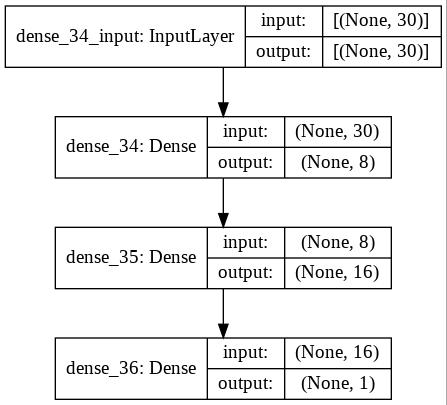

In [196]:
plot_model(model, to_file='n_reg_model.jpg', show_shapes=True)

# 가중치 확인하기

In [197]:
model.get_weights()

[array([[-5.1789725e-01, -2.0336549e+00, -1.3246216e+00,  1.4661899e+00,
         -7.1869683e-01,  2.7342603e-02,  3.0267090e-01,  7.7291411e-01],
        [ 3.9154420e+00,  2.1570570e+00,  3.1185014e+00,  2.4154696e+00,
          2.3256516e+00,  4.7068491e+00,  4.5898728e+00,  3.5115128e+00],
        [-1.4372418e+00,  1.0948952e-01, -1.3539052e+00,  3.7978272e+00,
         -1.4430435e+00,  3.0618116e-01, -7.5597727e-01,  7.7019274e-01],
        [-6.2107569e-01,  1.3379097e+00,  4.1868120e-01, -2.6060086e-01,
         -1.5995766e-01, -6.5444523e-01, -4.8626637e-01,  6.2130797e-01],
        [ 1.7951314e+00,  7.1929216e-02,  1.6838338e+00,  9.5061964e-01,
          1.0035306e+00,  6.7769867e-01,  1.3452259e-01, -2.8573370e+00],
        [-4.4219766e-02,  1.3112379e+00, -9.4053781e-01,  3.2040763e+00,
         -1.2600380e+00, -7.5158042e-01, -9.3195212e-01,  7.3988116e-01],
        [-2.2168876e-01, -1.4291465e+00, -1.9286869e+00,  7.1367413e-01,
          9.7477621e-01, -1.6673733e-01,  8.7

# 첫 번쨰 은닉층의 가중치

여기서 가중치라 함은 각 레이어에서 다음 레이어로 전파되기 전에 각 노드에서의 값을 전파하기 위한 일종의 정보라 할 수 있다.

In [198]:
pd.DataFrame(model.get_weights()[0])

,0,1,2,3,4,5,6,7
0,-0.517897,-2.033655,-1.324622,1.466190,-0.718697,0.027343,0.302671,0.772914
1,3.915442,2.157057,3.118501,2.415470,2.325652,4.706849,4.589873,3.511513
2,-1.437242,0.109490,-1.353905,3.797827,-1.443043,0.306181,-0.755977,0.770193
3,-0.621076,1.337910,0.418681,-0.260601,-0.159958,-0.654445,-0.486266,0.621308
4,1.795131,0.071929,1.683834,0.950620,1.003531,0.677699,0.134523,-2.857337
5,-0.044220,1.311238,-0.940538,3.204076,-1.260038,-0.751580,-0.931952,0.739881
6,-0.221689,-1.429147,-1.928687,0.713674,0.974776,-0.166737,0.879599,-0.818215
7,1.992736,1.586214,-0.161876,0.931904,0.022510,-0.667175,-1.853618,-3.079775
8,-1.147661,-2.613506,2.015058,-3.169001,1.279051,-0.055275,-0.409065,-0.661196
9,0.916255,-0.249935,0.959962,1.517143,1.470454,0.155894,-0.332884,-0.831381


# 첫 번째 은닉층의 편향 확인하기

편향이 다소 있는 편이다.

In [199]:
pd.DataFrame(model.get_weights()[1])

,0
0,0.866678
1,1.296777
2,1.978216
3,2.542431
4,2.534518
5,2.484684
6,1.828531
7,2.690965


# 두 번째 은닉층의 가중치 확인하기

이 역시 출력레이어에 전달되기전에 어떤 가중치들이 있는지 확인해보는 것이다.

In [200]:
pd.DataFrame(model.get_weights()[2])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,-0.695547,-0.511373,2.107451,2.583958,2.702068,0.068283,2.640384,2.141618,2.192020,2.311323,2.972645,2.589440,2.416180,2.399047,-0.699002,-1.041837
1,-0.867792,-0.310474,1.911233,2.719499,2.295250,-0.386418,2.457095,2.780670,2.485085,1.818566,1.979861,2.024059,2.399524,2.095364,-0.510247,-0.354526
2,-0.681308,-0.680747,1.681010,2.358729,2.471394,-0.376023,2.000123,1.878817,1.622506,1.673029,1.411121,1.987052,2.370589,1.541210,-1.029426,-1.009458
3,-0.721904,-0.770768,2.700809,2.584018,1.850194,-0.365859,1.854449,2.242182,2.688106,2.315454,2.410642,2.616039,2.427621,2.466274,-0.712149,-0.944728
4,-0.862419,-1.050008,2.348703,2.748501,3.222189,-0.945206,2.783887,2.643949,2.885656,1.969869,2.405116,2.344758,3.130086,2.219704,-0.814391,-0.485888
5,-0.558977,-0.271593,3.318446,3.204743,2.679761,-0.832505,2.687233,3.079737,3.003671,2.827584,2.311594,3.298406,3.109746,2.509611,-0.600292,-1.010603
6,-0.430481,-0.650778,1.854101,2.279602,2.638867,-0.831409,1.959213,2.498999,2.815528,1.471986,2.551107,1.858856,2.480776,2.290082,-0.720475,-0.556278
7,-0.683788,-0.760992,2.969902,2.683962,2.147468,-0.818591,2.907804,2.672026,2.626211,2.510038,2.894564,2.682360,2.957511,2.995989,-0.594497,-0.363181


# 두 번째 은닉층의 편향 확인해보기

역시 어느정도 편향이 있는 모습이다.

In [201]:
pd.DataFrame(model.get_weights()[3])

,0
0,-0.753998
1,-0.600550
2,3.748399
3,3.763402
4,3.753783
5,-0.449545
6,3.726859
7,3.744839
8,3.748208
9,3.330774


# 출력층의 가중치 확인해보기

마지막 예측가중치를 확인하는 모습

In [202]:
pd.DataFrame(model.get_weights()[4])

,0
0,0.339376
1,0.172389
2,2.857343
3,2.857706
4,2.688884
5,0.597608
6,2.539052
7,2.858691
8,2.599840
9,2.327721


# 출력층의 편향 확인하기

편향이 여전히 남아있다.

In [203]:
pd.DataFrame(model.get_weights()[5])

,0
0,3.391782


# 모델에서 사용된 파라미터 종류 살펴보기

In [204]:
reg_history_dict=reg_history.history
reg_history_dict.keys()

dict_keys(['loss', 'mae', 'val_loss', 'val_mae', 'lr'])

# 모델이 학습과정을 거치면서 남겨진 기록들을 확인해본다.

마지막에 있는 값들이 학습을 끝낸 최종 파라미터 및 값들이다.

In [205]:
reg_history.history

{'loss': [12612155.0,
  5371781.0,
  3397310.0,
  3119145.75,
  3152554.25,
  3039898.25,
  2829589.5,
  2719067.25,
  2928877.5,
  2545104.75,
  2591589.5,
  2489363.0,
  2351177.75,
  2439015.0,
  2413803.25,
  2366595.5,
  2257987.0,
  2103161.5,
  2004385.625,
  1986789.625,
  1976059.5,
  1991374.75,
  1969921.625,
  1965682.25,
  1955476.625,
  1950683.5,
  1970079.25,
  1922577.625,
  1921221.375,
  1920116.375,
  1920318.375,
  1918717.25,
  1917777.375,
  1917890.875,
  1917640.625,
  1916849.375,
  1915689.375],
 'lr': [0.1,
  0.1,
  0.1,
  0.1,
  0.1,
  0.1,
  0.1,
  0.1,
  0.1,
  0.1,
  0.1,
  0.1,
  0.1,
  0.1,
  0.1,
  0.1,
  0.1,
  0.01,
  0.01,
  0.01,
  0.01,
  0.01,
  0.01,
  0.01,
  0.01,
  0.01,
  0.01,
  0.001,
  0.001,
  0.001,
  0.001,
  0.001,
  0.001,
  0.001,
  0.001,
  0.001,
  0.001],
 'mae': [2551.29541015625,
  1596.826171875,
  1269.1343994140625,
  1193.478515625,
  1215.074462890625,
  1200.5269775390625,
  1149.8538818359375,
  1108.013916015625,
  115

# 최종 학습률 확인

0.001에서 멈춘 모습이다.

In [206]:
reg_history.history['lr'][-1]

0.001

# 최종 loss함수 값 확인

In [207]:
reg_history.history['loss'][-1]

1915689.375

# 최종 mae값 확인

In [208]:
reg_history.history['mae'][-1]

967.4137573242188

# 최종 검증 손실값 확인

In [209]:
reg_history.history['val_loss'][-1]

3975946.0

# 최종 검증 mae 값 확인

훈련 mae와 검증 mae가 어느정도 차이가 있는 모습이다.

하지만 수치상 과적합이라 판단하긴 어렵다.

In [210]:
reg_history.history['val_mae'][-1]

1336.8135986328125

# 전체 성능지표 그래프 한번에 확인하기

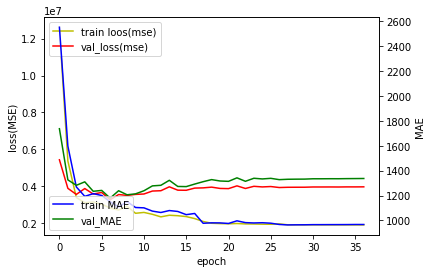

In [211]:
fig, loss_ax = plt.subplots()
acc_ax=loss_ax.twinx()

loss_ax.plot(reg_history.history['loss'], 'y', label='train loos(mse)')
loss_ax.plot(reg_history.history['val_loss'], 'r', label='val_loss(mse)')
acc_ax.plot(reg_history.history['mae'], 'b', label='train MAE')
acc_ax.plot(reg_history.history['val_mae'], 'g', label='val_MAE')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss(MSE)')
acc_ax.set_ylabel('MAE')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')
plt.show()

# 성능지표 따로따로 확인하기

loss 그래프의 경우 어느정도 차이가 있는 모습이다.

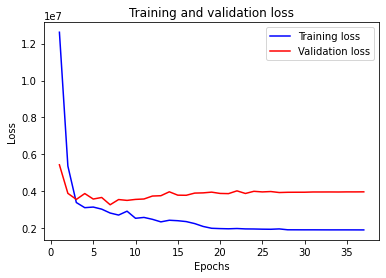

In [212]:
reg_history_dict=reg_history.history
loss=reg_history_dict['loss']
val_loss=reg_history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss', color='red')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

# mae 그래프로 확인하기

이 역시 어느정도 validation과 train이 차이가 있는 모습이다.

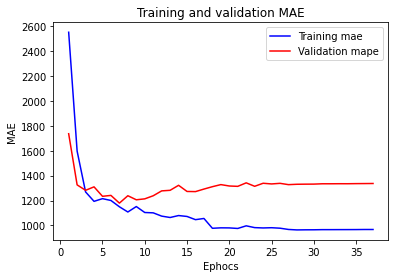

In [213]:
plt.clf()
train_metric=reg_history_dict['mae']
val_metric = reg_history_dict['val_mae']

plt.plot(epochs, train_metric, 'b', label='Training mae')
plt.plot(epochs, val_metric, label= 'Validation mape', color='red')
plt.title('Training and validation MAE')
plt.xlabel('Ephocs')
plt.ylabel('MAE')
plt.legend()

plt.show()

# 모델의 예측값 구하기

In [214]:
y_pred=model.predict(test_x)
y_pred

array([[  900.7876 ],
       [ 2160.9702 ],
       [ 2874.0544 ],
       [ 4490.9185 ],
       [ 1369.8652 ],
       [ 1519.8068 ],
       [ 6214.3643 ],
       [ 2796.1838 ],
       [ 2517.0876 ],
       [ 1854.9901 ],
       [ 1636.3798 ],
       [ 2948.448  ],
       [ 3390.202  ],
       [ 1238.2535 ],
       [ 1273.837  ],
       [ 4663.78   ],
       [ 4068.1267 ],
       [ 2459.0813 ],
       [ 2341.592  ],
       [ 1385.0881 ],
       [ 1492.1182 ],
       [ 2314.3105 ],
       [ 2575.8809 ],
       [ 1941.6407 ],
       [ 3769.9382 ],
       [ 4306.8765 ],
       [10247.514  ],
       [ 3149.1465 ],
       [  782.3466 ],
       [ 4418.324  ],
       [ 2595.2578 ],
       [ 4764.7305 ],
       [ 2277.8235 ],
       [ 2432.4983 ],
       [ 2295.4006 ],
       [ 7407.308  ],
       [ 1934.526  ],
       [ 5384.332  ],
       [ 5014.571  ],
       [ 2631.0183 ],
       [ 1750.2557 ],
       [ 3840.793  ],
       [ 6359.3613 ],
       [ 4754.0576 ],
       [ 4262.7715 ],
       [ 2

# 위에 짜놓은 함수에 적용시키기 위해 test와 예측값들을 정제해 준다.

In [222]:
ytyt=pd.DataFrame(test_y)
ytyt=ytyt.reset_index()
ytyt=ytyt.drop(['index'], axis=1)
ytyt

,AMOUNT
0,3447.0
1,3398.0
2,1546.0
3,5954.0
4,1393.0
...,...
195,1352.0
196,14027.0
197,2476.0
198,7119.0


In [223]:
yyy=pd.DataFrame(y_pred)
yyy.columns=['AMOUNT']
yyy

,AMOUNT
0,900.787598
1,2160.970215
2,2874.054443
3,4490.918457
4,1369.865234
...,...
195,3783.125977
196,9899.003906
197,3512.690918
198,6441.320801


# RMSE, MAE, MAPE, MPE 구하기

In [241]:
rmse1=pd.DataFrame(rmse(ytyt, yyy),columns=['RMSE'])
mae1=pd.DataFrame(mae(ytyt, yyy), columns=['MAE'])
mape1=pd.DataFrame(mape(ytyt, yyy), columns=['MAPE'])
mpe1=pd.DataFrame(mpe(ytyt, yyy), columns=['MPE'])

In [242]:
print(rmse1)
print(mae1)
print(mape1)
print(mpe1)

               RMSE
AMOUNT  1789.298422
                MAE
AMOUNT  1199.929643
             MAPE
AMOUNT  45.956742
             MPE
AMOUNT -0.221819


# rmse, mae, mape, mpe를 시각화로 살펴보기

rmse와 mae그래프를 통해 편차를 확인하면 심각하진 않지만, 어느정도의 오차가 있는 모습이다.

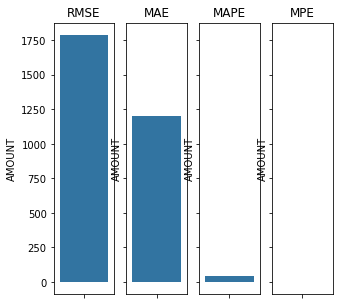

In [253]:
f,axes=plt.subplots(1,4,figsize=(5,5),sharex=True,sharey=True)
axes[0].set_title('RMSE')
axes[1].set_title('MAE')
axes[2].set_title('MAPE')
axes[3].set_title('MPE')
axes[0].set_ylabel('METRICS')

metrics1=sns.barplot(y=rmse1.loc['AMOUNT'],ax=axes[0])
metrics2=sns.barplot(y=mae1.loc['AMOUNT'],ax=axes[1])
metrics3=sns.barplot(y=mape1.loc['AMOUNT'],ax=axes[2])
metrics4=sns.barplot(y=mpe1.loc['AMOUNT'],ax=axes[3])

# 두 번째 신경망모델 Regression 시작

레이어 2층, node수를 32, 64로 한다. 또한, activation은 가장 성능이 좋다고 알려진 relu함수를 사용하며, learning_rate은 0.1로 시작, 손실함수를 mse로 둬서 가중치를 설정하고 성능을 관찰하고 업데이트 하기 위해서 mae를 사용한다.

또한, 에포크는 300으로 설정하였지만, patience를 에폭의 10%로 설정한다. 또한, batch_size는 데이터의 양이 충분하지 않으므로 적당히 20으로 설정한다. 하지만 batch_size가 적게 되면 컴퓨팅 시간과 수렴값이 계속 맴돌 수 있기 때문에 ealry_stopping을 사용한다. 

매 iteration마다 학습을 관찰하기 위해 verbose를 1로 설정하고, 최적화 함수로는 제일 유명한 adam으로 설정한다.

In [256]:
tf.random.set_seed(2016251029)
model = models.Sequential()
model.add(layers.Dense(32,activation='relu', input_shape=(train_x.shape[1],)))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(1))
adam = tf.keras.optimizers.Adam(learning_rate=0.1)
model.compile(optimizer = adam, loss='mse', metrics=['mae'])
es=tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=30, verbose=1, restore_best_weights=True)
lr= tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', facotr=0.1, min_lr=0.001)
reg_history=model.fit(train_x, train_y, epochs=300, batch_size=20, validation_split=0.2, callbacks=[es,lr], validation_data=(valid_x,valid_y))

Epoch 1/300
26/26 [==============================] - 1s 12ms/step - loss: 13053830.4074 - mae: 2511.1616 - val_loss: 5687300.5000 - val_mae: 1729.6372
Epoch 2/300
26/26 [==============================] - 0s 4ms/step - loss: 4726364.0463 - mae: 1532.4516 - val_loss: 3513547.7500 - val_mae: 1216.1466
Epoch 3/300
26/26 [==============================] - 0s 4ms/step - loss: 2784133.3056 - mae: 1114.2022 - val_loss: 3487650.7500 - val_mae: 1195.9587
Epoch 4/300
26/26 [==============================] - 0s 4ms/step - loss: 2791750.9907 - mae: 1151.0969 - val_loss: 3558016.7500 - val_mae: 1196.7471
Epoch 5/300
26/26 [==============================] - 0s 3ms/step - loss: 2755492.9259 - mae: 1091.9320 - val_loss: 4838405.0000 - val_mae: 1508.8232
Epoch 6/300
26/26 [==============================] - 0s 4ms/step - loss: 3065772.8889 - mae: 1231.1252 - val_loss: 3879186.0000 - val_mae: 1271.2858
Epoch 7/300
26/26 [==============================] - 0s 4ms/step - loss: 2285426.5648 - mae: 1016.6846 -

# 모델 요약해보기

노드수를 증가시키니 파라미터들이 992, 2112로 증가했음을 알 수 있다.

In [257]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_41 (Dense)             (None, 32)                992       
_________________________________________________________________
dense_42 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_43 (Dense)             (None, 1)                 65        
Total params: 3,169
Trainable params: 3,169
Non-trainable params: 0
_________________________________________________________________


# 시각화를 통해 살펴보기

30 - 30개

30 - 32개

32 - 64개

64 - 1개로 정보들이 전파된 모습이다.

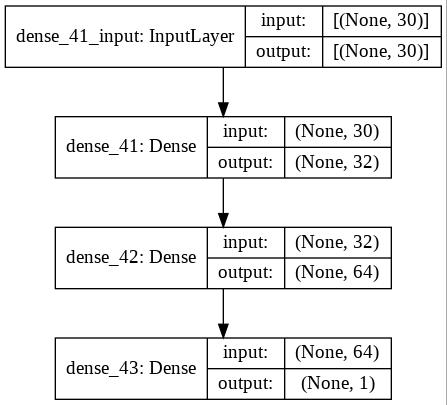

In [258]:
plot_model(model, to_file='n_reg_model.jpg', show_shapes=True)

# 가중치 확인하기

In [259]:
model.get_weights()

[array([[ 1.63585639e+00,  6.69483721e-01, -3.49259764e-01,
         -3.38019878e-01,  4.54946250e-01, -1.53413510e+00,
          2.80157596e-01, -1.20673525e+00,  5.72834350e-02,
          6.71002924e-01,  6.43209457e-01, -1.16369985e-01,
         -1.41793990e+00, -7.23406300e-02, -1.92688629e-01,
         -2.65999258e-01, -8.03692520e-01, -3.92507106e-01,
         -1.17456603e+00, -6.33355603e-02,  1.97565407e-01,
          8.90511930e-01, -1.66756594e+00, -5.22873878e-01,
         -6.13168716e-01, -2.27399811e-01,  9.24152970e-01,
         -2.83337891e-01, -1.07238901e+00,  1.23384285e+00,
          2.44237378e-01,  6.42655432e-01],
        [ 2.23836708e+00,  2.04219317e+00,  1.34583390e+00,
          3.39636183e+00,  2.41692996e+00,  1.80458283e+00,
          2.76938176e+00,  2.26186895e+00,  1.41617978e+00,
          2.95839834e+00,  3.05054307e+00,  2.52423120e+00,
          1.69785306e-01,  2.14220953e+00,  3.96476150e+00,
          2.41525936e+00,  3.02234721e+00,  1.72486198e+

# 학습이 끝난후 최종 파라미터들 확인하기

학습률 0.001

손실함수 값 1231349

mae 790

검증 손실함수 3987088

mae 1358 이다.

이 경우 이전보다 mae의 차이가 벌어진 것을 알 수 있는데, 노드의 수를 증가시키니 과적합이 의심된다.

In [260]:
print(reg_history.history['lr'][-1])
print(reg_history.history['loss'][-1])
print(reg_history.history['mae'][-1])
print(reg_history.history['val_loss'][-1])
print(reg_history.history['val_mae'][-1])


0.001
1231349.5
790.616455078125
3987088.5
1358.70458984375


# 각각의 loss와 성능지표를 그래프를 통해 살펴보기

결과적으로 편차가 더 벌어진 것을 보면 과적합의 문제가 생긴 것을 의심해 볼 수 있다.

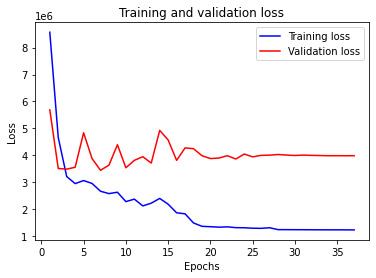

In [261]:
reg_history_dict=reg_history.history
loss=reg_history_dict['loss']
val_loss=reg_history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss', color='red')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

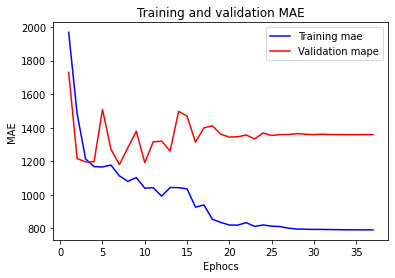

In [262]:
plt.clf()
train_metric=reg_history_dict['mae']
val_metric = reg_history_dict['val_mae']

plt.plot(epochs, train_metric, 'b', label='Training mae')
plt.plot(epochs, val_metric, label= 'Validation mape', color='red')
plt.title('Training and validation MAE')
plt.xlabel('Ephocs')
plt.ylabel('MAE')
plt.legend()

plt.show()

# 예측값을 구하고 RMSE, MAE등 성능지표 살펴보기

In [263]:
y_pred=model.predict(test_x)
yyy=pd.DataFrame(y_pred)
yyy.columns=['AMOUNT']
rmse1=pd.DataFrame(rmse(ytyt, yyy),columns=['RMSE'])
mae1=pd.DataFrame(mae(ytyt, yyy), columns=['MAE'])
mape1=pd.DataFrame(mape(ytyt, yyy), columns=['MAPE'])
mpe1=pd.DataFrame(mpe(ytyt, yyy), columns=['MPE'])
print(rmse1)
print(mae1)
print(mape1)
print(mpe1)

               RMSE
AMOUNT  1952.818746
                MAE
AMOUNT  1209.366886
             MAPE
AMOUNT  39.234903
             MPE
AMOUNT -0.052184


# 그래프를 통해 살펴보기

이전보다 성능지표들의 값들이 대체적으로 증가한 것을 알 수있다.

우려하던 과적합의 문제는 그렇게 크진 않아보이지만 노드의 수를 증가시키니 되려 성능이 떨어진 것을 알 수 있다.

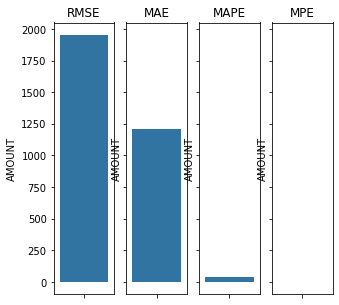

In [264]:
f,axes=plt.subplots(1,4,figsize=(5,5),sharex=True,sharey=True)
axes[0].set_title('RMSE')
axes[1].set_title('MAE')
axes[2].set_title('MAPE')
axes[3].set_title('MPE')
axes[0].set_ylabel('METRICS')

metrics1=sns.barplot(y=rmse1.loc['AMOUNT'],ax=axes[0])
metrics2=sns.barplot(y=mae1.loc['AMOUNT'],ax=axes[1])
metrics3=sns.barplot(y=mape1.loc['AMOUNT'],ax=axes[2])
metrics4=sns.barplot(y=mpe1.loc['AMOUNT'],ax=axes[3])

# 세 번째 신경망모델 Regression 시작

레이어 4층, node수를 8, 16, 32, 64로 한다. 또한, activation은 가장 성능이 좋다고 알려진 relu함수를 사용하며, learning_rate은 0.1로 시작, 손실함수를 mse로 둬서 가중치를 설정하고 성능을 관찰하고 업데이트 하기 위해서 mae를 사용한다.

또한, 에포크는 300으로 설정하였지만, patience를 에폭의 10%로 설정한다. 또한, batch_size는 데이터의 양이 충분하지 않으므로 적당히 20으로 설정한다. 하지만 batch_size가 적게 되면 컴퓨팅 시간과 수렴값이 계속 맴돌 수 있기 때문에 ealry_stopping을 사용한다. 

매 iteration마다 학습을 관찰하기 위해 verbose를 1로 설정하고, 최적화 함수로는 제일 유명한 adam으로 설정한다.

In [265]:
tf.random.set_seed(2016251029)
model = models.Sequential()
model.add(layers.Dense(8,activation='relu', input_shape=(train_x.shape[1],)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(32,activation='relu'))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(1))
adam = tf.keras.optimizers.Adam(learning_rate=0.1)
model.compile(optimizer = adam, loss='mse', metrics=['mae'])
es=tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=30, verbose=1, restore_best_weights=True)
lr= tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', facotr=0.1, min_lr=0.001)
reg_history=model.fit(train_x, train_y, epochs=300, batch_size=20, validation_split=0.2, callbacks=[es,lr], validation_data=(valid_x,valid_y))

Epoch 1/300
26/26 [==============================] - 1s 12ms/step - loss: 12150103.6111 - mae: 2388.5797 - val_loss: 4993590.0000 - val_mae: 1548.5944
Epoch 2/300
26/26 [==============================] - 0s 4ms/step - loss: 5365909.0602 - mae: 1541.4354 - val_loss: 7337546.5000 - val_mae: 1890.3120
Epoch 3/300
26/26 [==============================] - 0s 4ms/step - loss: 5196624.8148 - mae: 1598.3628 - val_loss: 4717060.0000 - val_mae: 1461.8191
Epoch 4/300
26/26 [==============================] - 0s 5ms/step - loss: 3667564.0185 - mae: 1297.4772 - val_loss: 4352503.0000 - val_mae: 1339.5291
Epoch 5/300
26/26 [==============================] - 0s 4ms/step - loss: 3278418.8843 - mae: 1241.4804 - val_loss: 4995283.5000 - val_mae: 1443.1917
Epoch 6/300
26/26 [==============================] - 0s 3ms/step - loss: 3451344.7407 - mae: 1244.1477 - val_loss: 4014839.0000 - val_mae: 1268.2936
Epoch 7/300
26/26 [==============================] - 0s 4ms/step - loss: 3422037.9537 - mae: 1205.3692 -

# 모델 요약

마지막 은닉층에서 파라미터의 값이 대폭 증가한 것을 알 수 있다.

In [266]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_44 (Dense)             (None, 8)                 248       
_________________________________________________________________
dense_45 (Dense)             (None, 16)                144       
_________________________________________________________________
dense_46 (Dense)             (None, 32)                544       
_________________________________________________________________
dense_47 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_48 (Dense)             (None, 1)                 65        
Total params: 3,113
Trainable params: 3,113
Non-trainable params: 0
_________________________________________________________________


# 그래프를 통해 살펴보기

30 - 8

8 - 16

16 - 32

32 - 64

64 - 1 로 정보가 전파된 모습이다.

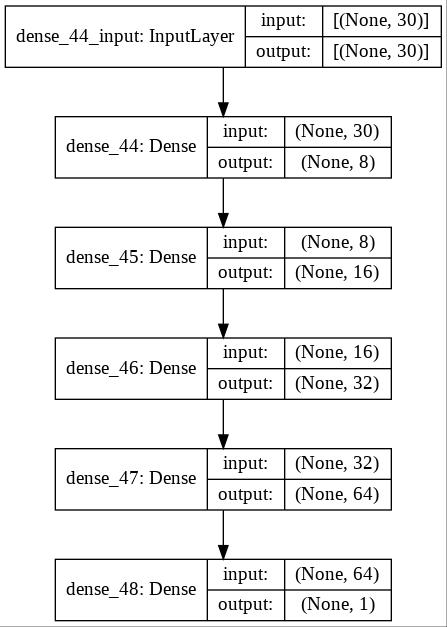

In [267]:
plot_model(model, to_file='n_reg_model.jpg', show_shapes=True)

# 모델 가중치 확인하기

In [268]:
model.get_weights()

[array([[-1.0337172 ,  0.56538814,  0.5142047 , -0.6964527 ,  0.3223449 ,
         -0.286366  ,  0.39486873, -0.44316772],
        [ 1.7387822 ,  1.8157042 ,  2.7681713 ,  2.6491213 ,  1.3074423 ,
          2.1209636 ,  2.8317728 ,  3.0214818 ],
        [-1.5417064 ,  0.77907467, -1.2826755 ,  0.5883595 ,  0.59653074,
          0.07801512,  0.27508804,  1.2922217 ],
        [ 0.57241285,  0.06414178, -1.096213  , -0.33898306, -2.1284006 ,
         -0.46952304,  0.87565404,  0.5323857 ],
        [-0.07699264,  1.6966792 ,  1.5993862 ,  0.36741465,  1.3436308 ,
          0.22855796, -1.7117933 , -2.0159485 ],
        [-0.8983858 ,  0.08351035, -0.43995714, -0.8618715 ,  1.366524  ,
          0.34184805,  1.2163585 ,  0.12358631],
        [-0.635425  ,  0.61905694, -0.3815554 , -0.17368641, -0.8364697 ,
         -0.8263168 ,  0.3995309 , -0.0776412 ],
        [ 0.97642434,  0.39190766,  0.6504563 , -0.37477112, -1.3113147 ,
          0.16296002,  0.665555  , -1.6063255 ],
        [-0.5572

# 학습이 끝난후 파라미터 살펴보기

학습률은 0.001

LOSS 1753059

MAE 925

VAL_LOSS 4253403

VAL_MAE 1358 이며

노드의 수를 증가시키고 층을 더 쌓았음에도 지표들이 크게 달라지진 않았다.

In [269]:
print(reg_history.history['lr'][-1])
print(reg_history.history['loss'][-1])
print(reg_history.history['mae'][-1])
print(reg_history.history['val_loss'][-1])
print(reg_history.history['val_mae'][-1])

0.001
1753059.625
925.3304443359375
4253403.5
1358.1849365234375


# 그래프를 통해 살펴보기

loss와 mae 값들이 에폭을 진행할수록 크게 출렁이다가 갑자기 급격하게 수렴하는 모습을 볼 수 있는데, 이는 데이터에 비해 모델이 지나치게 복잡하다는 것을 의미한다.

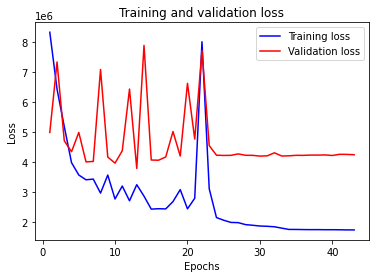

In [270]:
reg_history_dict=reg_history.history
loss=reg_history_dict['loss']
val_loss=reg_history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss', color='red')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

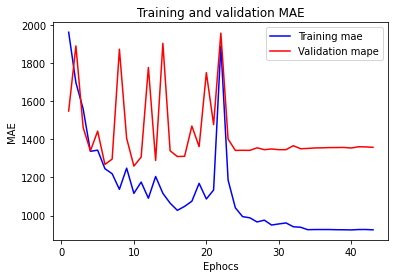

In [271]:
plt.clf()
train_metric=reg_history_dict['mae']
val_metric = reg_history_dict['val_mae']

plt.plot(epochs, train_metric, 'b', label='Training mae')
plt.plot(epochs, val_metric, label= 'Validation mape', color='red')
plt.title('Training and validation MAE')
plt.xlabel('Ephocs')
plt.ylabel('MAE')
plt.legend()

plt.show()

# 예측값을 출력하고 성능지표 살펴보기 및 그래프 살펴보기

In [272]:
y_pred=model.predict(test_x)
yyy=pd.DataFrame(y_pred)
yyy.columns=['AMOUNT']
rmse1=pd.DataFrame(rmse(ytyt, yyy),columns=['RMSE'])
mae1=pd.DataFrame(mae(ytyt, yyy), columns=['MAE'])
mape1=pd.DataFrame(mape(ytyt, yyy), columns=['MAPE'])
mpe1=pd.DataFrame(mpe(ytyt, yyy), columns=['MPE'])
print(rmse1)
print(mae1)
print(mape1)
print(mpe1)

               RMSE
AMOUNT  1906.701136
                MAE
AMOUNT  1245.165656
             MAPE
AMOUNT  46.155595
             MPE
AMOUNT -0.196767


# RMSE, MAE 등 그래프 살펴보기

편차는 조금 줄어들은 모습이지만, 성능이 크게 개선된건 아니다.

추측해보건대, 이 데이터셋은 모델이 복잡할수록 성능이 좋진 않다고 판단이 된다.

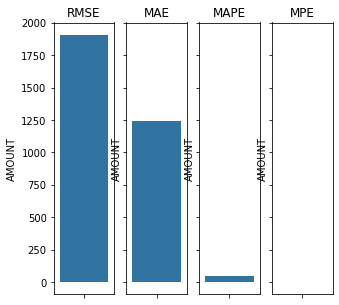

In [273]:
f,axes=plt.subplots(1,4,figsize=(5,5),sharex=True,sharey=True)
axes[0].set_title('RMSE')
axes[1].set_title('MAE')
axes[2].set_title('MAPE')
axes[3].set_title('MPE')
axes[0].set_ylabel('METRICS')

metrics1=sns.barplot(y=rmse1.loc['AMOUNT'],ax=axes[0])
metrics2=sns.barplot(y=mae1.loc['AMOUNT'],ax=axes[1])
metrics3=sns.barplot(y=mape1.loc['AMOUNT'],ax=axes[2])
metrics4=sns.barplot(y=mpe1.loc['AMOUNT'],ax=axes[3])

# 네 번째 신경망모델 Regression 시작

레이어 4층, node수를 32, 32, 32, 64로 한다. 또한, activation은 가장 성능이 좋다고 알려진 relu함수를 사용하며, learning_rate은 0.1로 시작, 손실함수를 mse로 둬서 가중치를 설정하고 성능을 관찰하고 업데이트 하기 위해서 mae를 사용한다.

또한, 에포크는 300으로 설정하였지만, patience를 에폭의 10%로 설정한다. 또한, batch_size는 데이터의 양이 충분하지 않으므로 적당히 20으로 설정한다. 하지만 batch_size가 적게 되면 컴퓨팅 시간과 수렴값이 계속 맴돌 수 있기 때문에 ealry_stopping을 사용한다. 

매 iteration마다 학습을 관찰하기 위해 verbose를 1로 설정하고, 최적화 함수로는 제일 유명한 adam으로 설정한다.

마지막으로 레이어와 노드들이 증가할수록 성능이 나빠지는지 다시 확인해 본다.

또한, 학습률을 1로 지정해 봄으로써 그 효과를 살펴본다.

In [306]:
tf.random.set_seed(2016251029)
model = models.Sequential()
model.add(layers.Dense(32,activation='relu', input_shape=(train_x.shape[1],)))
model.add(layers.Dense(32,activation='relu'))
model.add(layers.Dense(32,activation='relu'))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(1))
adam = tf.keras.optimizers.Adam(learning_rate=1)
model.compile(optimizer = adam, loss='mse', metrics=['mae'])
es=tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=30, verbose=1, restore_best_weights=True)
lr= tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', facotr=0.1, min_lr=0.001)
reg_history=model.fit(train_x, train_y, epochs=300, batch_size=20, validation_split=0.2, callbacks=[es,lr], validation_data=(valid_x,valid_y))

Epoch 1/300
26/26 [==============================] - 1s 13ms/step - loss: 8568319753.3704 - mae: 31471.1133 - val_loss: 15009219.0000 - val_mae: 2924.4915
Epoch 2/300
26/26 [==============================] - 0s 5ms/step - loss: 11264349.3519 - mae: 2208.1258 - val_loss: 7135047.5000 - val_mae: 2056.6724
Epoch 3/300
26/26 [==============================] - 0s 5ms/step - loss: 6723300.5741 - mae: 2083.8456 - val_loss: 6479441.0000 - val_mae: 1771.7053
Epoch 4/300
26/26 [==============================] - 0s 4ms/step - loss: 6425404.0370 - mae: 1865.8954 - val_loss: 6470039.5000 - val_mae: 1778.2297
Epoch 5/300
26/26 [==============================] - 0s 4ms/step - loss: 6610143.6944 - mae: 1902.1788 - val_loss: 6466523.0000 - val_mae: 1781.8684
Epoch 6/300
26/26 [==============================] - 0s 4ms/step - loss: 8108806.7407 - mae: 2110.7982 - val_loss: 6581220.0000 - val_mae: 1754.6350
Epoch 7/300
26/26 [==============================] - 0s 4ms/step - loss: 8518242.7222 - mae: 1978.1

# 모델 요약

전체적으로 파라미터들의 수가 증가한 것을 알 수 있다.

In [307]:
model.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_67 (Dense)             (None, 32)                992       
_________________________________________________________________
dense_68 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_69 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_70 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_71 (Dense)             (None, 1)                 65        
Total params: 5,281
Trainable params: 5,281
Non-trainable params: 0
_________________________________________________________________


# 시각화를 통해 알아보기

30 - 30

30 - 32

32 - 32

32 - 32

32 - 64

64 - 1 로 정보가 전파된 것을 알 수 있다.

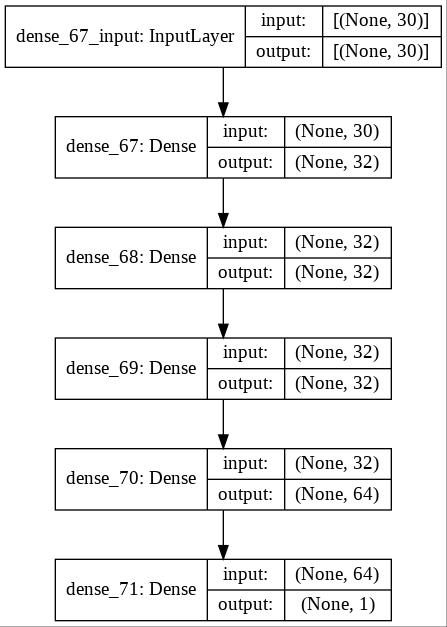

In [308]:
plot_model(model, to_file='n_reg_model.jpg', show_shapes=True)

# 모델의 파라미터 확인

학습률은 0에 수렴

loss 7173265

mae 1971

val_loss 6470486

val_mae 1777이다.

얼핏 보기에 mae와 검증용 mae가 얼마 차이가 안나는 듯 싶지만, 학습률이 0에 수렴했다는 것은 과적합이 분명히 발생했음을 알 수 있다.

이는 학습률을 1로 지정해둔 탓이 크다고 생각된다.

In [309]:
print(reg_history.history['lr'][-1])
print(reg_history.history['loss'][-1])
print(reg_history.history['mae'][-1])
print(reg_history.history['val_loss'][-1])
print(reg_history.history['val_mae'][-1])

0
7173265.0
1971.2427978515625
6470486.5
1777.8349609375


# 시각화를 통해 에폭마다의 loss, 성능지표 살펴보기

학습과 검증의 iteration이 아예 같은 값으로 수렴했음을 알 수 있는데, 이는 과적합을 의심해보기에 충분하다.

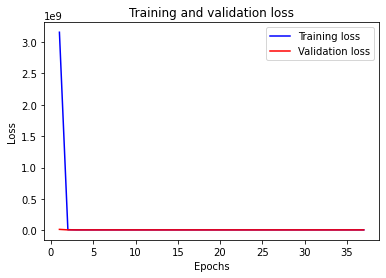

In [310]:
reg_history_dict=reg_history.history
loss=reg_history_dict['loss']
val_loss=reg_history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss', color='red')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

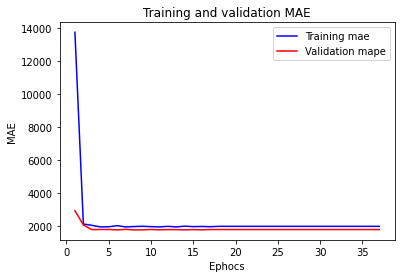

In [311]:
plt.clf()
train_metric=reg_history_dict['mae']
val_metric = reg_history_dict['val_mae']

plt.plot(epochs, train_metric, 'b', label='Training mae')
plt.plot(epochs, val_metric, label= 'Validation mape', color='red')
plt.title('Training and validation MAE')
plt.xlabel('Ephocs')
plt.ylabel('MAE')
plt.legend()

plt.show()

# 각 성능지표 확인해보기

확실히 레이어와 노드를 증가시키고 학습률을 1로 설정해두니 편차가 심한 것을 알 수 있다. 이는 학습률에 따른 과적합이 주 원인이라 생각한다.

In [312]:
y_pred=model.predict(test_x)
yyy=pd.DataFrame(y_pred)
yyy.columns=['AMOUNT']
rmse1=pd.DataFrame(rmse(ytyt, yyy),columns=['RMSE'])
mae1=pd.DataFrame(mae(ytyt, yyy), columns=['MAE'])
mape1=pd.DataFrame(mape(ytyt, yyy), columns=['MAPE'])
mpe1=pd.DataFrame(mpe(ytyt, yyy), columns=['MPE'])
print(rmse1)
print(mae1)
print(mape1)
print(mpe1)

               RMSE
AMOUNT  3074.763242
                MAE
AMOUNT  2150.060107
             MAPE
AMOUNT  99.830289
             MPE
AMOUNT -0.710969


# 그래프를 통해 성능지표별 점수 살펴보기

RMSE와 MAE의 편차도 큰 편이고, 전체적으로 값이 증가했다. 즉, 성능이 더 나빠졌다.

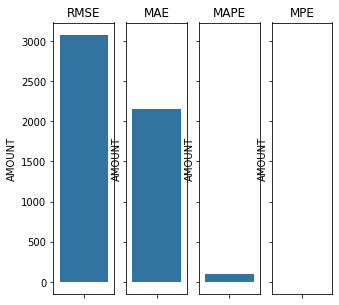

In [313]:
f,axes=plt.subplots(1,4,figsize=(5,5),sharex=True,sharey=True)
axes[0].set_title('RMSE')
axes[1].set_title('MAE')
axes[2].set_title('MAPE')
axes[3].set_title('MPE')
axes[0].set_ylabel('METRICS')

metrics1=sns.barplot(y=rmse1.loc['AMOUNT'],ax=axes[0])
metrics2=sns.barplot(y=mae1.loc['AMOUNT'],ax=axes[1])
metrics3=sns.barplot(y=mape1.loc['AMOUNT'],ax=axes[2])
metrics4=sns.barplot(y=mpe1.loc['AMOUNT'],ax=axes[3])

# 다섯 번째 신경망모델 Regression 시작

레이어 4층, node수를 2, 4, 8, 16으로 한다. 또한, activation은 가장 성능이 좋다고 알려진 relu함수를 사용하며, learning_rate은 0.1로 시작, 손실함수를 mse로 둬서 가중치를 설정하고 성능을 관찰하고 업데이트 하기 위해서 mae를 사용한다.

또한, 에포크는 300으로 설정하였지만, patience를 에폭의 10%로 설정한다. 또한, batch_size는 데이터의 양이 충분하지 않으므로 적당히 20으로 설정한다. 하지만 batch_size가 적게 되면 컴퓨팅 시간과 수렴값이 계속 맴돌 수 있기 때문에 ealry_stopping을 사용한다. 

매 iteration마다 학습을 관찰하기 위해 verbose를 1로 설정하고, 최적화 함수로는 제일 유명한 adam으로 설정한다. 

이전 실험에서 노드의 수와 학습률이 높을수록 성능이 안좋은 것을 알았으므로 조금 낮춰본다.

학습률을 이번에는 0.01로 지정해본다.

In [282]:
tf.random.set_seed(2016251029)
model = models.Sequential()
model.add(layers.Dense(2,activation='relu', input_shape=(train_x.shape[1],)))
model.add(layers.Dense(4,activation='relu'))
model.add(layers.Dense(8,activation='relu'))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1))
adam = tf.keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer = adam, loss='mse', metrics=['mae'])
es=tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=30, verbose=1, restore_best_weights=True)
lr= tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', facotr=0.01, min_lr=0.0001)
reg_history=model.fit(train_x, train_y, epochs=300, batch_size=20, validation_split=0.2, callbacks=[es,lr], validation_data=(valid_x,valid_y))

Epoch 1/300
26/26 [==============================] - 1s 12ms/step - loss: 17090966.2963 - mae: 3101.5811 - val_loss: 17040088.0000 - val_mae: 3252.9492
Epoch 2/300
26/26 [==============================] - 0s 3ms/step - loss: 15246948.7963 - mae: 2903.0693 - val_loss: 16220632.0000 - val_mae: 3141.8279
Epoch 3/300
26/26 [==============================] - 0s 3ms/step - loss: 14319235.1481 - mae: 2872.2241 - val_loss: 10828034.0000 - val_mae: 2354.7620
Epoch 4/300
26/26 [==============================] - 0s 4ms/step - loss: 7945900.4630 - mae: 1947.5057 - val_loss: 4796336.0000 - val_mae: 1572.5128
Epoch 5/300
26/26 [==============================] - 0s 3ms/step - loss: 4618606.5833 - mae: 1542.7044 - val_loss: 4431632.5000 - val_mae: 1431.3038
Epoch 6/300
26/26 [==============================] - 0s 4ms/step - loss: 4503191.9444 - mae: 1450.9687 - val_loss: 3980649.2500 - val_mae: 1394.5259
Epoch 7/300
26/26 [==============================] - 0s 3ms/step - loss: 3750756.5556 - mae: 1331.1

# 모델 요약

전체적으로 파라미터들의 수가 확 줄은 것을 알 수 있다.

In [283]:
model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_54 (Dense)             (None, 2)                 62        
_________________________________________________________________
dense_55 (Dense)             (None, 4)                 12        
_________________________________________________________________
dense_56 (Dense)             (None, 8)                 40        
_________________________________________________________________
dense_57 (Dense)             (None, 16)                144       
_________________________________________________________________
dense_58 (Dense)             (None, 1)                 17        
Total params: 275
Trainable params: 275
Non-trainable params: 0
_________________________________________________________________


# 시각화를 통해 살펴보기

30 - 30

30 - 2

2 - 4

4 - 8

8 - 16

16 - 1 로 정보들이 전파된 것을 알 수 있다.

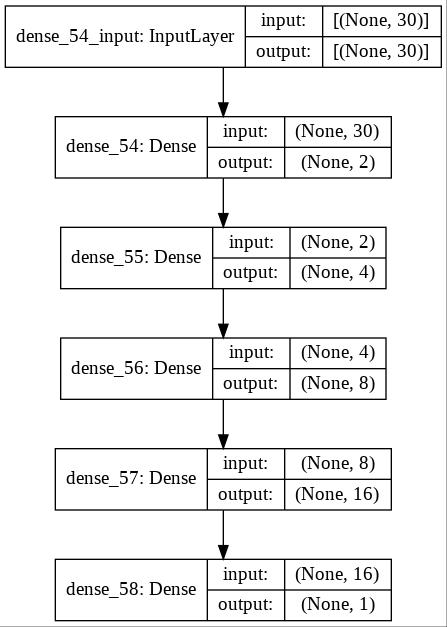

In [284]:
plot_model(model, to_file='n_reg_model.jpg', show_shapes=True)

# 각 파라미터들 살펴보기

학습률이 0.0001에 수렴

loss 2823537
mae 1147
val_loss 3602339
val_mae 1254 이다.

mae와 val_mae의 차이를 보니 과적합문제는 없다고 판단된다.

In [285]:
print(reg_history.history['lr'][-1])
print(reg_history.history['loss'][-1])
print(reg_history.history['mae'][-1])
print(reg_history.history['val_loss'][-1])
print(reg_history.history['val_mae'][-1])

9.999999e-05
2823537.0
1147.576416015625
3602339.5
1254.6121826171875


# 시각화를 통해 살펴보기

loss와 성능지표 그래프들을 살펴보면 굽이치지 않고 안정적으로 수렴해 감을 알 수 있다.

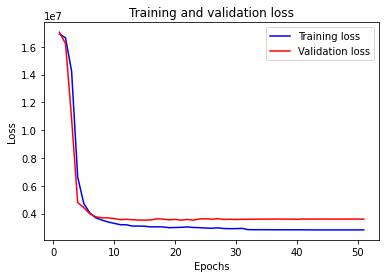

In [286]:
reg_history_dict=reg_history.history
loss=reg_history_dict['loss']
val_loss=reg_history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss', color='red')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

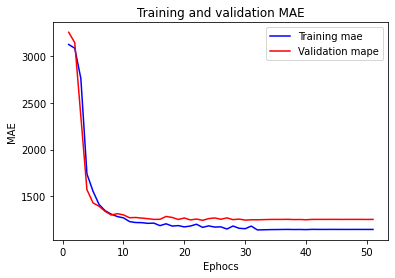

In [287]:
plt.clf()
train_metric=reg_history_dict['mae']
val_metric = reg_history_dict['val_mae']

plt.plot(epochs, train_metric, 'b', label='Training mae')
plt.plot(epochs, val_metric, label= 'Validation mape', color='red')
plt.title('Training and validation MAE')
plt.xlabel('Ephocs')
plt.ylabel('MAE')
plt.legend()

plt.show()

# 각 성능지표 살펴보기

이전의 실험보다 훨씬 성능이 좋아진 것을 알 수 있다.

이것으로 이 데이터셋은 레이어와 학습률이 높으면 성능이 나빠지고, 다소 단순한 모델일 수록 예측을 잘하는 것을 알 수 있다.

In [288]:
y_pred=model.predict(test_x)
yyy=pd.DataFrame(y_pred)
yyy.columns=['AMOUNT']
rmse1=pd.DataFrame(rmse(ytyt, yyy),columns=['RMSE'])
mae1=pd.DataFrame(mae(ytyt, yyy), columns=['MAE'])
mape1=pd.DataFrame(mape(ytyt, yyy), columns=['MAPE'])
mpe1=pd.DataFrame(mpe(ytyt, yyy), columns=['MPE'])
print(rmse1)
print(mae1)
print(mape1)
print(mpe1)

               RMSE
AMOUNT  1856.226923
                MAE
AMOUNT  1266.874853
             MAPE
AMOUNT  48.343189
             MPE
AMOUNT -0.170742


# 그래프를 통해 살펴보기

전체적으로 성능이 크게 증가했으며, RMSE와 MAE의 값이 차이가 크지 않아 과적합 문제도 방지된 것을 알 수 있다.

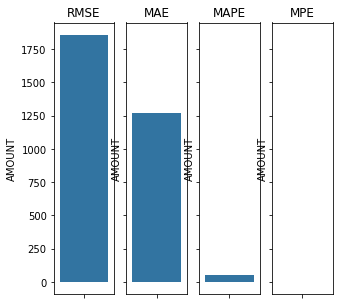

In [289]:
f,axes=plt.subplots(1,4,figsize=(5,5),sharex=True,sharey=True)
axes[0].set_title('RMSE')
axes[1].set_title('MAE')
axes[2].set_title('MAPE')
axes[3].set_title('MPE')
axes[0].set_ylabel('METRICS')

metrics1=sns.barplot(y=rmse1.loc['AMOUNT'],ax=axes[0])
metrics2=sns.barplot(y=mae1.loc['AMOUNT'],ax=axes[1])
metrics3=sns.barplot(y=mape1.loc['AMOUNT'],ax=axes[2])
metrics4=sns.barplot(y=mpe1.loc['AMOUNT'],ax=axes[3])

# 여섯 번째 신경망모델 Regression 시작

레이어 3층, node수를 2, 4, 8로 한다. 또한, activation은 가장 성능이 좋다고 알려진 relu함수를 사용하며, learning_rate은 0.1로 시작, 손실함수를 mse로 둬서 가중치를 설정하고 성능을 관찰하고 업데이트 하기 위해서 mae를 사용한다.

또한, 에포크는 300으로 설정하였지만, patience를 에폭의 10%로 설정한다. 또한, batch_size는 데이터의 양이 충분하지 않으므로 적당히 20으로 설정한다. 하지만 batch_size가 적게 되면 컴퓨팅 시간과 수렴값이 계속 맴돌 수 있기 때문에 ealry_stopping을 사용한다. 

매 iteration마다 학습을 관찰하기 위해 verbose를 1로 설정하고, 최적화 함수로는 제일 유명한 adam으로 설정한다.

아까 보다 좀더 단순한 모델로 구성했으며 학습률은 0.01로 고정해본다.

In [332]:
tf.random.set_seed(2016251029)
model = models.Sequential()
model.add(layers.Dense(2,activation='relu', input_shape=(train_x.shape[1],)))
model.add(layers.Dense(4,activation='relu'))
model.add(layers.Dense(8,activation='relu'))
model.add(layers.Dense(1))
adam = tf.keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer = adam, loss='mse', metrics=['mae'])
es=tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=30, verbose=1, restore_best_weights=True)
lr= tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', facotr=0.1, min_lr=0.001)
reg_history=model.fit(train_x, train_y, epochs=300, batch_size=20, validation_split=0.2, callbacks=[es,lr], validation_data=(valid_x,valid_y))

Epoch 1/300
26/26 [==============================] - 1s 12ms/step - loss: 17097294.4074 - mae: 3102.6066 - val_loss: 17102516.0000 - val_mae: 3261.9150
Epoch 2/300
26/26 [==============================] - 0s 3ms/step - loss: 15381879.1481 - mae: 2922.8039 - val_loss: 17027572.0000 - val_mae: 3251.7720
Epoch 3/300
26/26 [==============================] - 0s 3ms/step - loss: 15850942.4815 - mae: 3082.9801 - val_loss: 16604382.0000 - val_mae: 3199.5271
Epoch 4/300
26/26 [==============================] - 0s 4ms/step - loss: 15177950.3704 - mae: 2986.7753 - val_loss: 15151318.0000 - val_mae: 3020.6987
Epoch 5/300
26/26 [==============================] - 0s 3ms/step - loss: 12534097.7963 - mae: 2582.4242 - val_loss: 11888440.0000 - val_mae: 2587.6418
Epoch 6/300
26/26 [==============================] - 0s 3ms/step - loss: 11526368.7778 - mae: 2375.2399 - val_loss: 7660637.5000 - val_mae: 1962.9464
Epoch 7/300
26/26 [==============================] - 0s 3ms/step - loss: 6722233.3148 - mae: 1

# 모델 요약

파라미터의 수들이 많이 줄어든 것을 알 수 있다.

In [333]:
model.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_75 (Dense)             (None, 2)                 62        
_________________________________________________________________
dense_76 (Dense)             (None, 4)                 12        
_________________________________________________________________
dense_77 (Dense)             (None, 8)                 40        
_________________________________________________________________
dense_78 (Dense)             (None, 1)                 9         
Total params: 123
Trainable params: 123
Non-trainable params: 0
_________________________________________________________________


# 시각화를 통해 살펴보기

30 - 30

30 - 2

2 - 4

4 - 8

8 - 1 로 정보가 전파된 것을 알 수 있다.

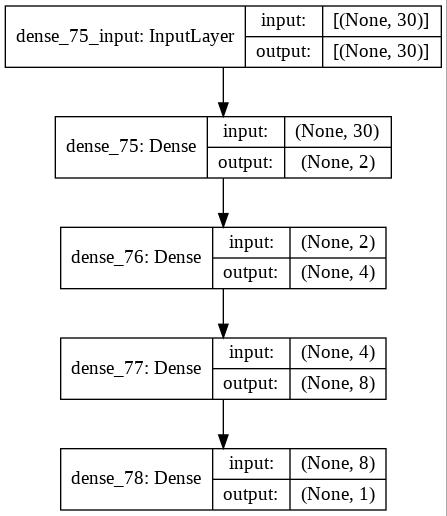

In [334]:
plot_model(model, to_file='n_reg_model.jpg', show_shapes=True)

# 파라미터들 살펴보기

학습률은 0.001

los는 3013718
mae는 1203
val_loss 3735545
val_mae 1287 임을 알 수 있다.

결과적으로 모델이 더 단순할 수록 과적합 문제는 충분히 해결되는 것을 알 수 있다.

In [335]:
print(reg_history.history['lr'][-1])
print(reg_history.history['loss'][-1])
print(reg_history.history['mae'][-1])
print(reg_history.history['val_loss'][-1])
print(reg_history.history['val_mae'][-1])

0.001
3013718.25
1203.5665283203125
3735545.5
1287.94287109375


# 가중치 확인하기

첫 번째 은닉층의 가중치는 다음과 같다.

두 번째 은닉층으로 전파되기전 각 값들이 갖는 가중치이다.

In [336]:
pd.DataFrame(model.get_weights()[0])

,0,1
0,-0.382465,-0.190350
1,3.228597,3.236747
2,0.679648,-0.611322
3,0.495527,-1.420641
4,0.506194,0.716535
5,0.448155,-0.574318
6,-1.353339,-0.033903
7,0.906739,-3.516875
8,-1.123566,0.030893
9,0.556483,1.000309


# 첫 번째 은닉층의 편향 확인하기

편향이 그리 크진 않은 모습이다.

In [337]:
pd.DataFrame(model.get_weights()[1])

,0
0,3.862121
1,3.104766


# 두 번째 은닉층의 가중치 확인하기

각 노드마다의 가중치이다. 세 번째 은닉층으로 정보가 전파되기전 가중치 행렬을 확인할 수 있었다.

In [338]:
pd.DataFrame(model.get_weights()[2])

,0,1,2,3
0,2.965671,2.773726,-1.007177,-0.076209
1,2.798809,3.051142,-0.029061,-0.921440


# 두 번째 은닉층의 편향 확인하기

가중치들이 점점 전파되면서 편향이 어느정도 생긴 모습이다.

In [339]:
pd.DataFrame(model.get_weights()[3])

,0
0,4.024225
1,3.785527
2,-0.209639
3,0.000000


# 세 번째 은닉층의 가중치 확인하기

# 출력층으로 전파되기전 가중치 행렬들을 확인할 수 있다.

In [340]:
pd.DataFrame(model.get_weights()[4])

,0,1,2,3,4,5,6,7
0,-0.613096,-0.509613,0.086948,3.465772,3.314708,-0.313050,2.945404,3.504216
1,0.013374,-0.072537,-0.159654,3.614752,3.008473,0.194732,2.045318,2.492296
2,0.534542,0.278010,-0.706411,-0.269992,-0.293167,0.502232,-0.083148,-0.332926
3,0.111355,0.462184,0.679510,0.028872,0.061205,-0.695362,-0.315840,0.136579


# 세 번째 은닉층의 편향 확인하기

이전보다 다시 편향이 줄어든 모습이다.

In [341]:
pd.DataFrame(model.get_weights()[5])

,0
0,-0.088001
1,0.000000
2,-0.276411
3,3.446130
4,2.994761
5,-0.181117
6,3.421284
7,3.008963


# 출력층의 가중치 행렬 확인하기

예측값들을 계산하기 위한 가중치들의 행렬을 확인할 수 있었다.

In [342]:
pd.DataFrame(model.get_weights()[6])

,0
0,-0.074121
1,-0.255937
2,-0.401231
3,3.030177
4,3.793169
5,-0.339521
6,2.972213
7,3.838442


# 출력층의 편향 확인하기

확실히 정보가 전파될 수록 편향이 안정되어감을 확인할 수 있었다.

In [343]:
pd.DataFrame(model.get_weights()[7])

,0
0,2.066779


# 그래프를 통해 loss랑 성능지표 살펴보기

train과 validation이 안정적으로 수렴해감을 알 수 있다.

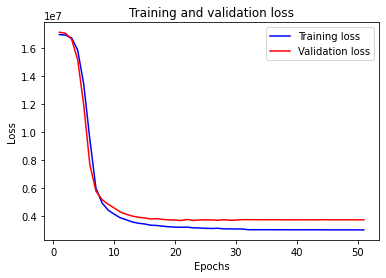

In [344]:
reg_history_dict=reg_history.history
loss=reg_history_dict['loss']
val_loss=reg_history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss', color='red')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

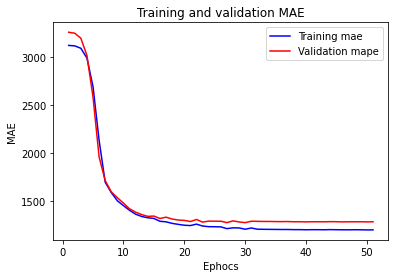

In [345]:
plt.clf()
train_metric=reg_history_dict['mae']
val_metric = reg_history_dict['val_mae']

plt.plot(epochs, train_metric, 'b', label='Training mae')
plt.plot(epochs, val_metric, label= 'Validation mape', color='red')
plt.title('Training and validation MAE')
plt.xlabel('Ephocs')
plt.ylabel('MAE')
plt.legend()

plt.show()

# 예측값에 따른 성능지표 살펴보기

RMSE값과 MAE값의 편차가 다소 적고, 성능도 준수한 것을 알 수 있다.

In [346]:
y_pred=model.predict(test_x)
yyy=pd.DataFrame(y_pred)
yyy.columns=['AMOUNT']
rmse1=pd.DataFrame(rmse(ytyt, yyy),columns=['RMSE'])
mae1=pd.DataFrame(mae(ytyt, yyy), columns=['MAE'])
mape1=pd.DataFrame(mape(ytyt, yyy), columns=['MAPE'])
mpe1=pd.DataFrame(mpe(ytyt, yyy), columns=['MPE'])
print(rmse1)
print(mae1)
print(mape1)
print(mpe1)

               RMSE
AMOUNT  1855.219961
                MAE
AMOUNT  1317.593374
             MAPE
AMOUNT  52.340892
             MPE
AMOUNT -0.171849


# 그래프를 통해 성능지표 살펴보기

rmse, ,mae차이가 적다. 즉, 과적합 문제는 없고 모델이 안정적임을 알 수 있다.

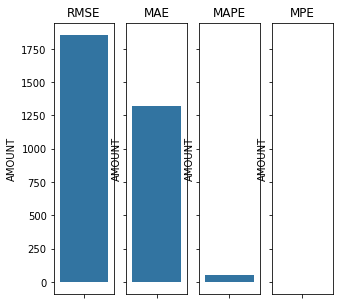

In [347]:
f,axes=plt.subplots(1,4,figsize=(5,5),sharex=True,sharey=True)
axes[0].set_title('RMSE')
axes[1].set_title('MAE')
axes[2].set_title('MAPE')
axes[3].set_title('MPE')
axes[0].set_ylabel('METRICS')

metrics1=sns.barplot(y=rmse1.loc['AMOUNT'],ax=axes[0])
metrics2=sns.barplot(y=mae1.loc['AMOUNT'],ax=axes[1])
metrics3=sns.barplot(y=mape1.loc['AMOUNT'],ax=axes[2])
metrics4=sns.barplot(y=mpe1.loc['AMOUNT'],ax=axes[3])

# 결과 정리

제일 성능이 좋았던 모델은 첫 번째 모델인

레이어 2층, node수를 8, 16으로 한 모델이며 이때의 학습률은 0.1이었다.

이때의 RMSE값은 1789대 였고, MAE는 1199였다. 

그리고 가장 레이어와 노드가 단순했다.



두 번째로 성능이 좋았던 모델은 여섯 번째 모델인

레이어 3층, node수를 2, 4, 8로 한 모델이며 이때의 학습률은 0.01이었다.

이때의 RMSE값은 1855, MAE는 1317이었다.

그리고 두 번째로 레이어와 노드가 단순했다.


위의 결과로 시사하는 바는 레이어와 노드가 복잡할 수록 모델이 이 데이터를 과대적합하는 경향, 혹은 너무 편향된 결과만을 내놓는 경향이 있다는 것이다.

신경망끼리의 레이어를 통해 정보를 전달함에 있어서 이 데이터셋은 단순할수록 좋고, 학습률도 높지 않은 0.01과 0.1사이의 값이 가장 적당함을 알 수 있었다.

Reference

데이터 출처 : https://m.blog.naver.com/PostView.nhn?blogId=swkim4610&logNo=220510602767&proxyReferer=https:%2F%2Fwww.google.com%2F